In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing

sns.set()

In [2]:
# load datasets

train_df = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_FaultFree_Training.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_Faulty_Training.csv')

In [ ]:
train_df

Unnamed: 0  faultNumber  simulationRun  sample  xmeas_1  xmeas_2  \
0                1            0              1       1  0.25038   3674.0   
1                2            0              1       2  0.25109   3659.4   
2                3            0              1       3  0.25038   3660.3   
3                4            0              1       4  0.24977   3661.3   
4                5            0              1       5  0.29405   3679.0   
...            ...          ...            ...     ...      ...      ...   
249995      249996            0            500     496  0.29325   3640.1   
249996      249997            0            500     497  0.29134   3625.7   
249997      249998            0            500     498  0.29438   3600.2   
249998      249999            0            500     499  0.25269   3683.5   
249999      250000            0            500     500  0.25214   3648.2   

        xmeas_3  xmeas_4  xmeas_5  xmeas_6  ...   xmv_2   xmv_3   xmv_4  \
0        4529.0   9.2320   26.889   42.402  ...  53.744  24.657  62.544   
1        4556.6   9.4264   26.721   42.576  ...  53.414  24.588  59.259   
2        4477.8   9.4426   26.875   42.070  ...  54.357  24.666  61.275   
3        4512.1   9.4776   26.758   42.063  ...  53.946  24.725  59.856   
4        4497.0   9.3381   26.889   42.650  ...  53.658  28.797  60.717   
...         ...      ...      ...      ...  ...     ...     ...     ...   
249995   4473.0   9.1949   26.867   42.379  ...  53.429  29.249  60.773   
249996   4506.2   9.2109   26.889   42.291  ...  53.830  28.975  61.517   
249997   4478.3   9.1957   26.820   42.448  ...  54.163  28.676  61.656   
249998   4486.4   9.2832   27.188   42.757  ...  53.453  24.889  61.564   
249999   4467.8   9.1344   26.886   42.534  ...  53.676  24.943  61.254   

         xmv_5   xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0       22.137  39.935  42.323  47.757  47.510  41.258  18.447  
1       22.084  40.176  38.554  43.692  47.427  41.359  17.194  
2       22.380  40.244  38.990  46.699  47.468  41.199  20.530  
3       22.277  40.257  38.072  47.541  47.658  41.643  18.089  
4       21.947  39.144  41.955  47.645  47.346  41.507  18.461  
...        ...     ...     ...     ...     ...     ...     ...  
249995  21.532  40.451  34.064  48.953  48.291  40.812  18.756  
249996  21.750  42.762  42.645  51.055  48.589  40.933  19.360  
249997  21.487  42.109  39.770  46.770  48.648  41.465  19.344  
249998  21.392  39.334  42.274  43.623  48.797  39.835  18.512  
249999  21.208  38.991  42.873  44.400  48.876  41.076  16.158  

[250000 rows x 56 columns]

In [ ]:
# remove the first 'unnamed' column

train_df = train_df.iloc[:,1:]
test_df = test_df.iloc[:,1:]

In [ ]:
# @title
'''
# rename stuff according to this paper: https://www.sciencedirect.com/science/article/pii/S0098135414000969?via%3Dihub

X_dict = {
'XMEAS_1':'A_feed_stream',
'XMEAS_2':'D_feed_stream',
'XMEAS_3':'E_feed_stream',
'XMEAS_4':'Total_fresh_feed_stripper',
'XMEAS_5':'Recycle_flow_into_rxtr',
'XMEAS_6':'Reactor_feed_rate',
'XMEAS_7':'Reactor_pressure',
'XMEAS_8':'Reactor_level',
'XMEAS_9':'Reactor_temp',
'XMEAS_10':'Purge_rate',
'XMEAS_11':'Separator_temp',
'XMEAS_12':'Separator_level',
'XMEAS_13':'Separator_pressure',
'XMEAS_14':'Separator_underflow',
'XMEAS_15':'Stripper_level',
'XMEAS_16':'Stripper_pressure',
'XMEAS_17':'Stripper_underflow',
'XMEAS_18':'Stripper_temperature',
'XMEAS_19':'Stripper_steam_flow',
'XMEAS_20':'Compressor_work',
'XMEAS_21':'Reactor_cooling_water_outlet_temp',
'XMEAS_22':'Condenser_cooling_water_outlet_temp',
'XMEAS_23':'Composition_of_A_rxtr_feed',
'XMEAS_24':'Composition_of_B_rxtr_feed',
'XMEAS_25':'Composition_of_C_rxtr_feed',
'XMEAS_26':'Composition_of_D_rxtr_feed',
'XMEAS_27':'Composition_of_E_rxtr_feed',
'XMEAS_28':'Composition_of_F_rxtr_feed',
'XMEAS_29':'Composition_of_A_purge',
'XMEAS_30':'Composition_of_B_purge',
'XMEAS_31':'Composition_of_C_purge',
'XMEAS_32':'Composition_of_D_purge',
'XMEAS_33':'Composition_of_E_purge',
'XMEAS_34':'Composition_of_F_purge',
'XMEAS_35':'Composition_of_G_purge',
'XMEAS_36':'Composition_of_H_purge',
'XMEAS_37':'Composition_of_D_product',
'XMEAS_38':'Composition_of_E_product',
'XMEAS_39':'Composition_of_F_product',
'XMEAS_40':'Composition_of_G_product',
'XMEAS_41':'Composition_of_H_product',
'XMV_1':'D_feed_flow_valve',
'XMV_2':'E_feed_flow_valve',
'XMV_3':'A_feed_flow_valve',
'XMV_4':'Total_feed_flow_stripper_valve',
'XMV_5':'Compressor_recycle_valve',
'XMV_6':'Purge_valve',
'XMV_7':'Separator_pot_liquid_flow_valve',
'XMV_8':'Stripper_liquid_product_flow_valve',
'XMV_9':'Stripper_steam_valve',
'XMV_10':'Reactor_cooling_water_flow_valve',
'XMV_11':'Condenser_cooling_water_flow_valve',
'XMV_12':'Agitator_speed'
   }

train_df = train_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
test_df = test_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
'''

In [3]:
X_dict = {
'XMEAS_1':'XMEAS1',
'XMEAS_2':'XMEAS2',
'XMEAS_3':'XMEAS3',
'XMEAS_4':'XMEAS4',
'XMEAS_5':'XMEAS5',
'XMEAS_6':'XMEAS6',
'XMEAS_7':'XMEAS7',
'XMEAS_8':'XMEAS8',
'XMEAS_9':'XMEAS9',
'XMEAS_10':'XMEAS10',
'XMEAS_11':'XMEAS11',
'XMEAS_12':'XMEAS12',
'XMEAS_13':'XMEAS13',
'XMEAS_14':'XMEAS14',
'XMEAS_15':'XMEAS15',
'XMEAS_16':'XMEAS16',
'XMEAS_17':'XMEAS17',
'XMEAS_18':'XMEAS18',
'XMEAS_19':'XMEAS19',
'XMEAS_20':'XMEAS20',
'XMEAS_21':'XMEAS21',
'XMEAS_22':'XMEAS22',
'XMEAS_23':'XMEAS23',
'XMEAS_24':'XMEAS24',
'XMEAS_25':'XMEAS25',
'XMEAS_26':'XMEAS26',
'XMEAS_27':'XMEAS27',
'XMEAS_28':'XMEAS28',
'XMEAS_29':'XMEAS29',
'XMEAS_30':'XMEAS30',
'XMEAS_31':'XMEAS31',
'XMEAS_32':'XMEAS32',
'XMEAS_33':'XMEAS33',
'XMEAS_34':'XMEAS34',
'XMEAS_35':'XMEAS35',
'XMEAS_36':'XMEAS36',
'XMEAS_37':'XMEAS37',
'XMEAS_38':'XMEAS38',
'XMEAS_39':'XMEAS39',
'XMEAS_40':'XMEAS40',
'XMEAS_41':'XMEAS41',
'XMV_1':'XMV1',
'XMV_2':'XMV2',
'XMV_3':'XMV3',
'XMV_4':'XMV4',
'XMV_5':'XMV5',
'XMV_6':'XMV6',
'XMV_7':'XMV7',
'XMV_8':'XMV8',
'XMV_9':'XMV9',
'XMV_10':'XMV10',
'XMV_11':'XMV11',
'XMV_12':'XMV12'
   }

train_df = train_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
test_df = test_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

In [ ]:
test_df

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  \
0                  1              1       1  0.25038   3674.0   4529.0   
1                  1              1       2  0.25109   3659.4   4556.6   
2                  1              1       3  0.25038   3660.3   4477.8   
3                  1              1       4  0.24977   3661.3   4512.1   
4                  1              1       5  0.29405   3679.0   4497.0   
...              ...            ...     ...      ...      ...      ...   
4999995           20            500     496  0.23419   3655.3   4461.7   
4999996           20            500     497  0.26704   3647.4   4540.2   
4999997           20            500     498  0.26543   3630.3   4571.6   
4999998           20            500     499  0.27671   3655.7   4498.9   
4999999           20            500     500  0.27421   3640.4   4474.4   

         xmeas_4  xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4  \
0         9.2320   26.889   42.402   2704.3  ...  53.744  24.657  62.544   
1         9.4264   26.721   42.576   2705.0  ...  53.414  24.588  59.259   
2         9.4426   26.875   42.070   2706.2  ...  54.357  24.666  61.275   
3         9.4776   26.758   42.063   2707.2  ...  53.946  24.725  59.856   
4         9.3381   26.889   42.650   2705.1  ...  53.658  28.797  60.717   
...          ...      ...      ...      ...  ...     ...     ...     ...   
4999995   9.3448   27.008   42.481   2703.0  ...  53.670  23.350  61.061   
4999996   9.3546   27.034   42.671   2704.7  ...  54.650  26.362  60.020   
4999997   9.4089   27.129   42.470   2705.1  ...  54.274  26.521  59.824   
4999998   9.3781   27.353   42.281   2705.8  ...  53.506  26.781  62.818   
4999999   9.3866   27.145   41.985   2706.0  ...  53.800  27.027  59.757   

          xmv_5   xmv_6   xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0        22.137  39.935  42.323  47.757  47.510  41.258  18.447  
1        22.084  40.176  38.554  43.692  47.427  41.359  17.194  
2        22.380  40.244  38.990  46.699  47.468  41.199  20.530  
3        22.277  40.257  38.072  47.541  47.658  41.643  18.089  
4        21.947  39.144  41.955  47.645  47.346  41.507  18.461  
...         ...     ...     ...     ...     ...     ...     ...  
4999995  20.719  40.999  38.653  47.386  47.528  40.212  17.659  
4999996  20.263  41.579  33.624  47.536  47.647  41.199  18.741  
4999997  20.189  41.505  40.967  52.437  47.802  41.302  23.199  
4999998  20.453  40.208  40.957  47.628  48.086  40.510  15.932  
4999999  20.157  40.326  36.039  48.885  48.170  41.115  15.752  

[5000000 rows x 55 columns]

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
# define quantile-quantile plot

def qqplot_faultwise(DataFrame, cols, faultnum):
    # feed the dataframe, define what columns we want to plot, and for what type (number) of fault

    plt.figure(figsize = (14,14))

    # define figure size

    for col in range(len(cols)):
        ax = plt.subplot(4, 4, col+1)
        plt.subplots_adjust(wspace=0.5, hspace=0.5)

        # generate plots for the columns we have chosen
        data = DataFrame[(DataFrame.faultNumber == faultnum) & (DataFrame.simulationRun.isin(range(10)))][cols[col]]
        # only plot the where the fault number matches the fault number we have provided, AND for ten simulation runs, for the columns defined

        stats.probplot(x = data, plot = plt) # generate plot on the existing matplotlib axes
        ax.set_title(cols[col], fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('')

        shapiro = stats.shapiro(data) # perform a Shapiro-Wilk normality test

        # annotate
        ax.text(0.99, 0.01,                 # place the text close to the bottom-right
            '{0:.4f}'.format(shapiro[1]),   # format the p-value (stored in shapiro[1]) to a string with 4 decimal places
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='green', fontsize=10)

    plt.show()



Text(0.99, 0.01, '0.0000')

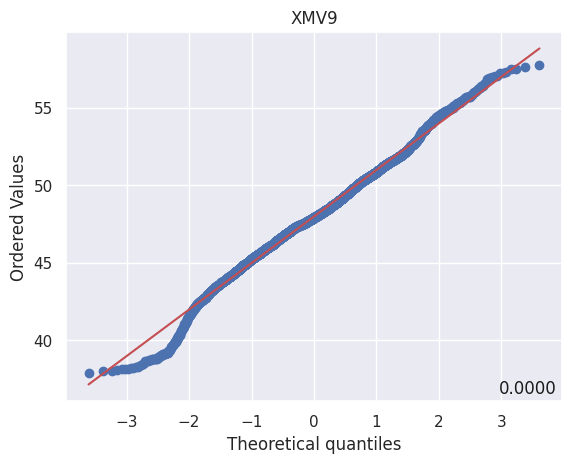

In [ ]:
# plot for thesis

colname = 'XMV9'
faultnum = 0

#data = test_df[(test_df.faultNumber == faultnum) & (test_df.simulationRun.isin(range(10)))]
data = train_df[(train_df.simulationRun.isin(range(10)))]
data = data[colname]
stats.probplot(x = data, plot = plt)
shapiro = stats.shapiro(data) # import scipy.stats as stats
ax = plt.subplot(1,1,1)

ax.set_title(colname)
ax.text(0.99, 0.01,                        # place the text close to the bottom-right
        '{0:.4f}'.format(shapiro[1]),   # format the p-value (stored in shapiro[1]) to a string with 4 decimal places
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='k', fontsize=12)


In [ ]:
train_df['XMEAS4'].head()

0    9.2320
1    9.4264
2    9.4426
3    9.4776
4    9.3381
Name: XMEAS4, dtype: float64

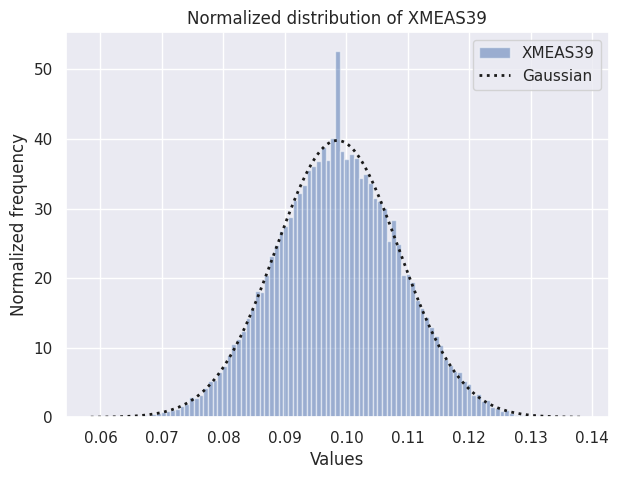

In [10]:
# Plotting with seaborn

colname = 'XMEAS39'
plot_data = train_df[colname]


plt.figure(figsize=(7, 5))  # Adjust the figure size if needed
plt.hist(plot_data, bins=100, alpha=0.5, label=colname, density=True)
plt.title(f'Normalized distribution of {colname}')
plt.xlabel('Values')
plt.ylabel('Normalized frequency')
plt.grid(True)


# overlay

mu = plot_data.mean()
std = plot_data.std()
N = len(plot_data)

x = np.linspace(mu - 4*std, mu + 4*std, N)
pdf = stats.norm.pdf(x, mu, std)
plt.plot(x, pdf, label='Gaussian', c='k', ls='dotted', linewidth=2)

plt.legend()

plt.show()

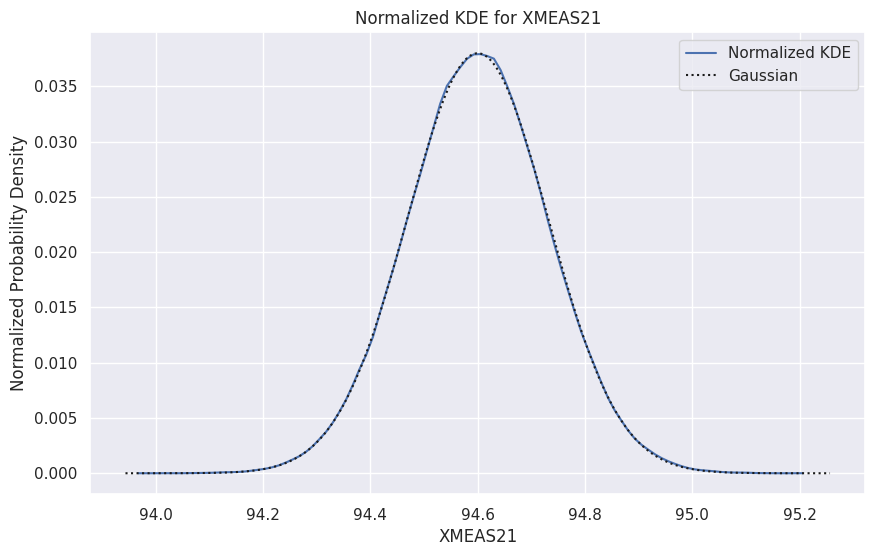

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming you have a DataFrame named df and a specific column 'column_name'
column_name = 'XMEAS21'

# Extract data from the column
plot_data = train_df[column_name]

# Compute the KDE
kde = gaussian_kde(plot_data)

# Generate x values for the plot
x_values = np.linspace(plot_data.min(), plot_data.max(), 100)

# Compute the normalized KDE values
kde_values = kde(x_values)
normalized_kde = kde_values / kde_values.sum()  # Normalization

# Plot the normalized KDE
plt.figure(figsize=(10, 6))
plt.plot(x_values, normalized_kde, label='Normalized KDE')
plt.title(f'Normalized KDE for {column_name}')
plt.xlabel(column_name)
plt.ylabel('Normalized Probability Density')
plt.legend()
plt.grid(True)


mu = plot_data.mean()
std = plot_data.std()
N = len(plot_data)

x = np.linspace(mu - 5*std, mu + 5*std, N)
pdf = stats.norm.pdf(x, mu, std)
plt.plot(x, pdf/80, label='Gaussian', c='k', ls='dotted')

plt.legend()


plt.show()


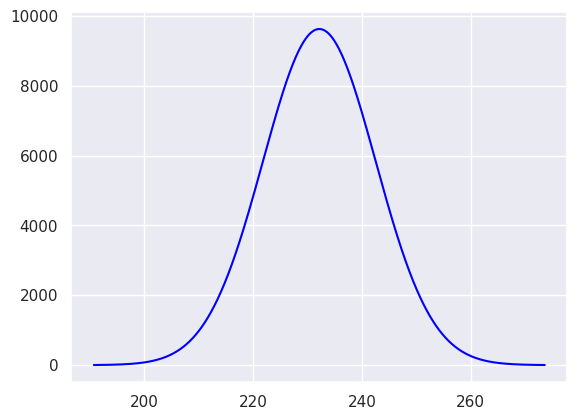

In [ ]:
mu = plot_data.mean()
std = plot_data.std()
N = len(plot_data)

x = np.linspace(mu - 4*std, mu + 4*std, N)

pdf = stats.norm.pdf(x, mu, std)

plt.plot(x, pdf*N, label='Gaussian Distribution', color='blue')

In [ ]:
mu, std, N

(232.16031352000002, 10.362102690477153, 250000)

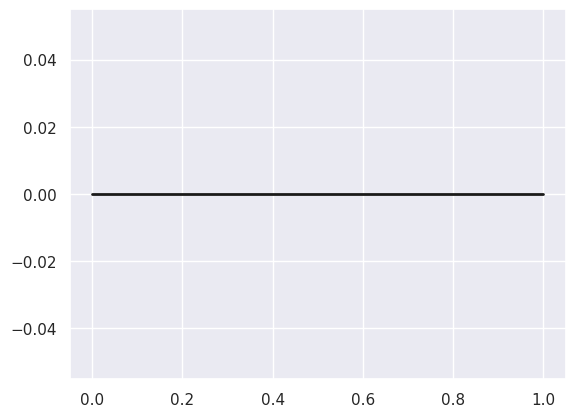

In [ ]:
mu, std = train_df[colname].mean(), train_df[colname].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


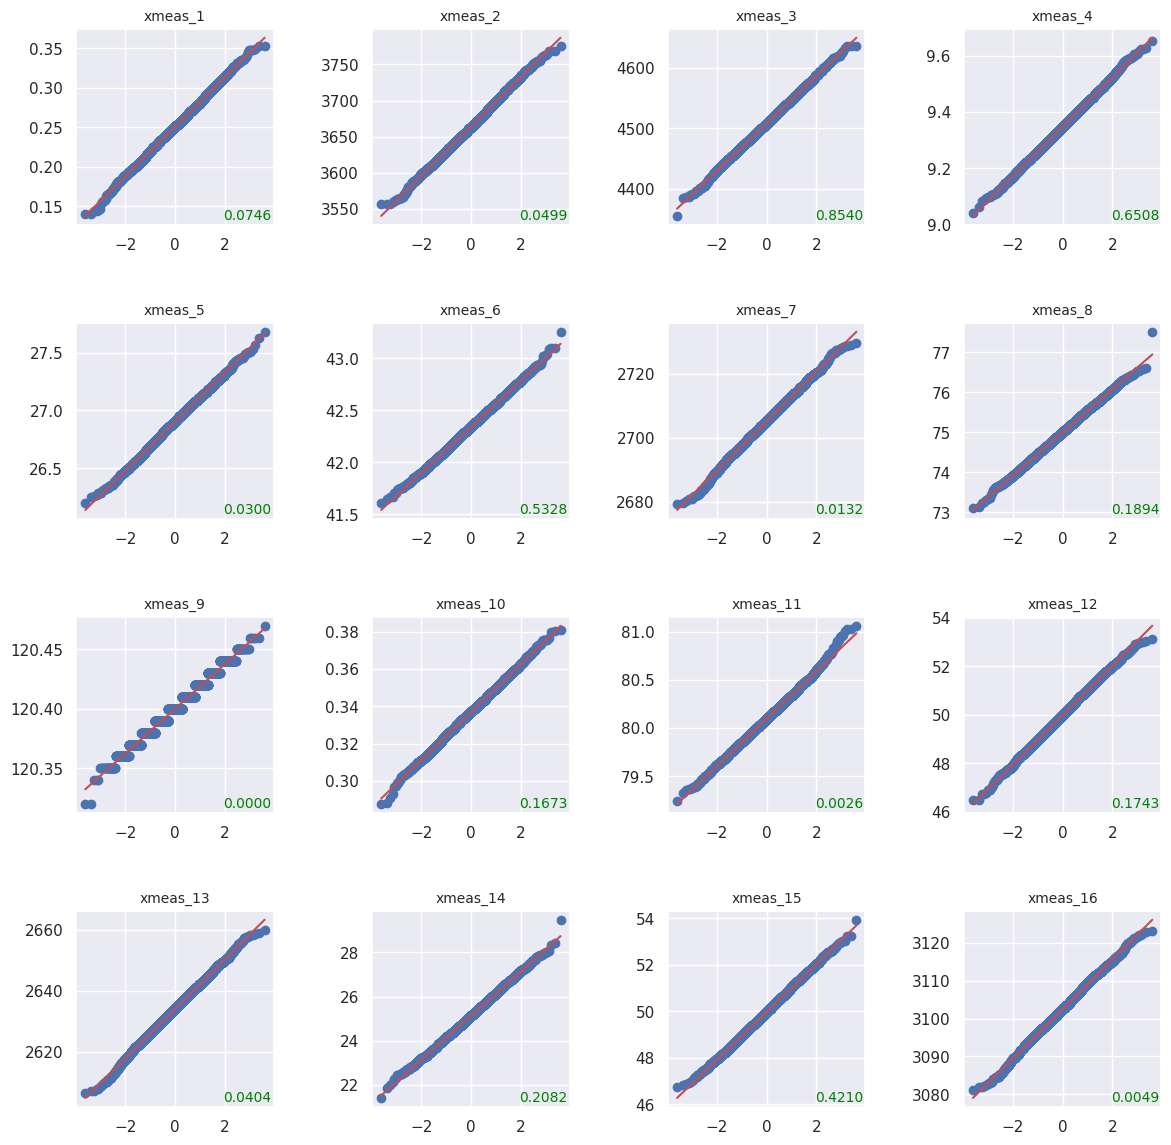

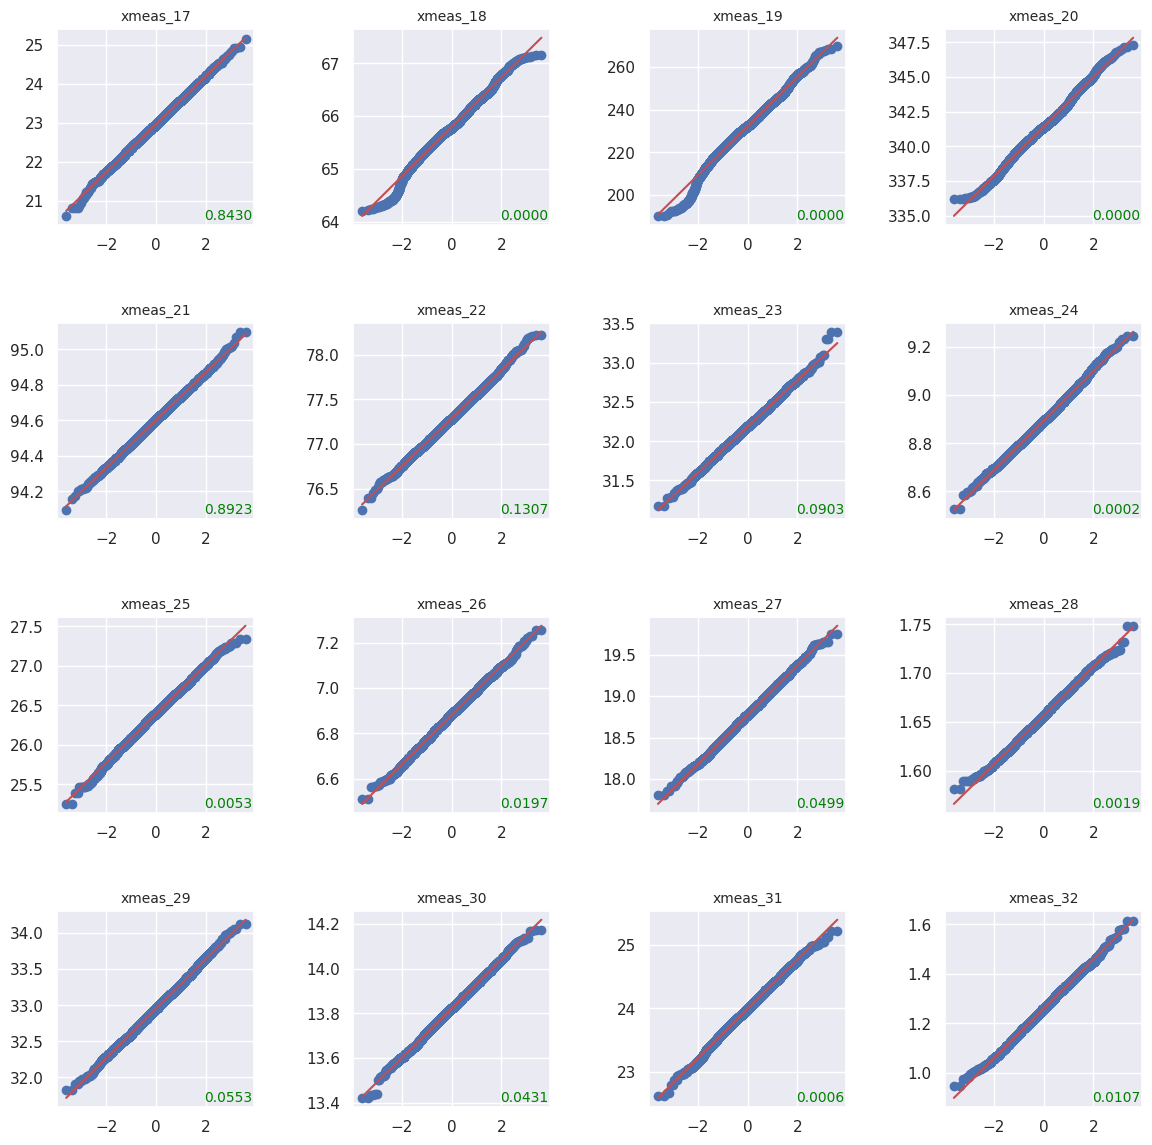

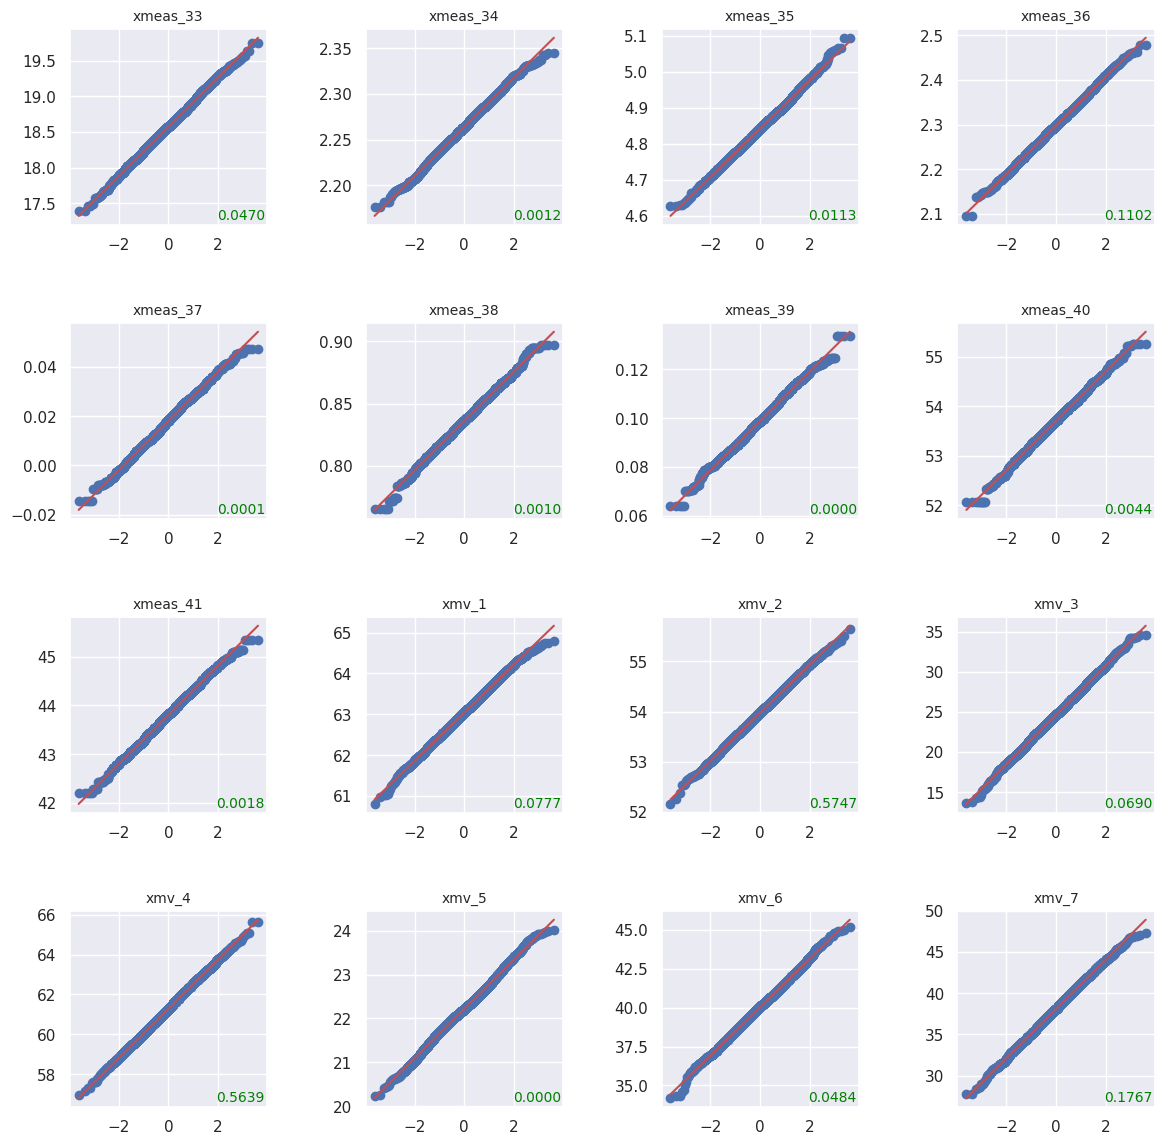

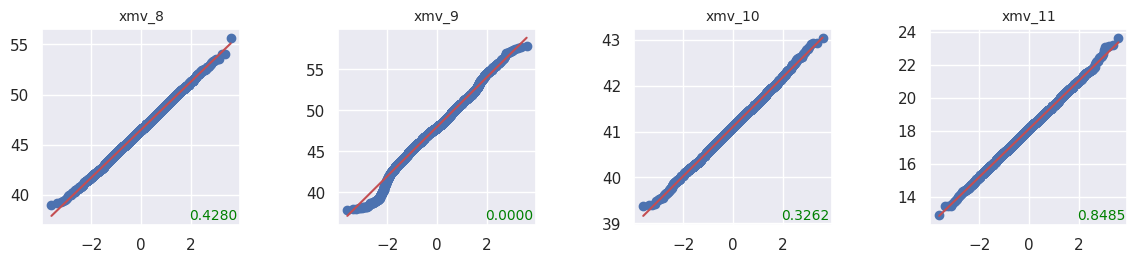

In [ ]:
# plot fault-free data (fault type '0')

qqplot_faultwise(train_df, train_df.columns[3:19], faultnum=0)
qqplot_faultwise(train_df, train_df.columns[19:35], faultnum=0)
qqplot_faultwise(train_df, train_df.columns[35:51], faultnum=0)
qqplot_faultwise(train_df, train_df.columns[51:], faultnum=0)

# we are using intervals of 16 columns because we defined our subplots to be 4x4

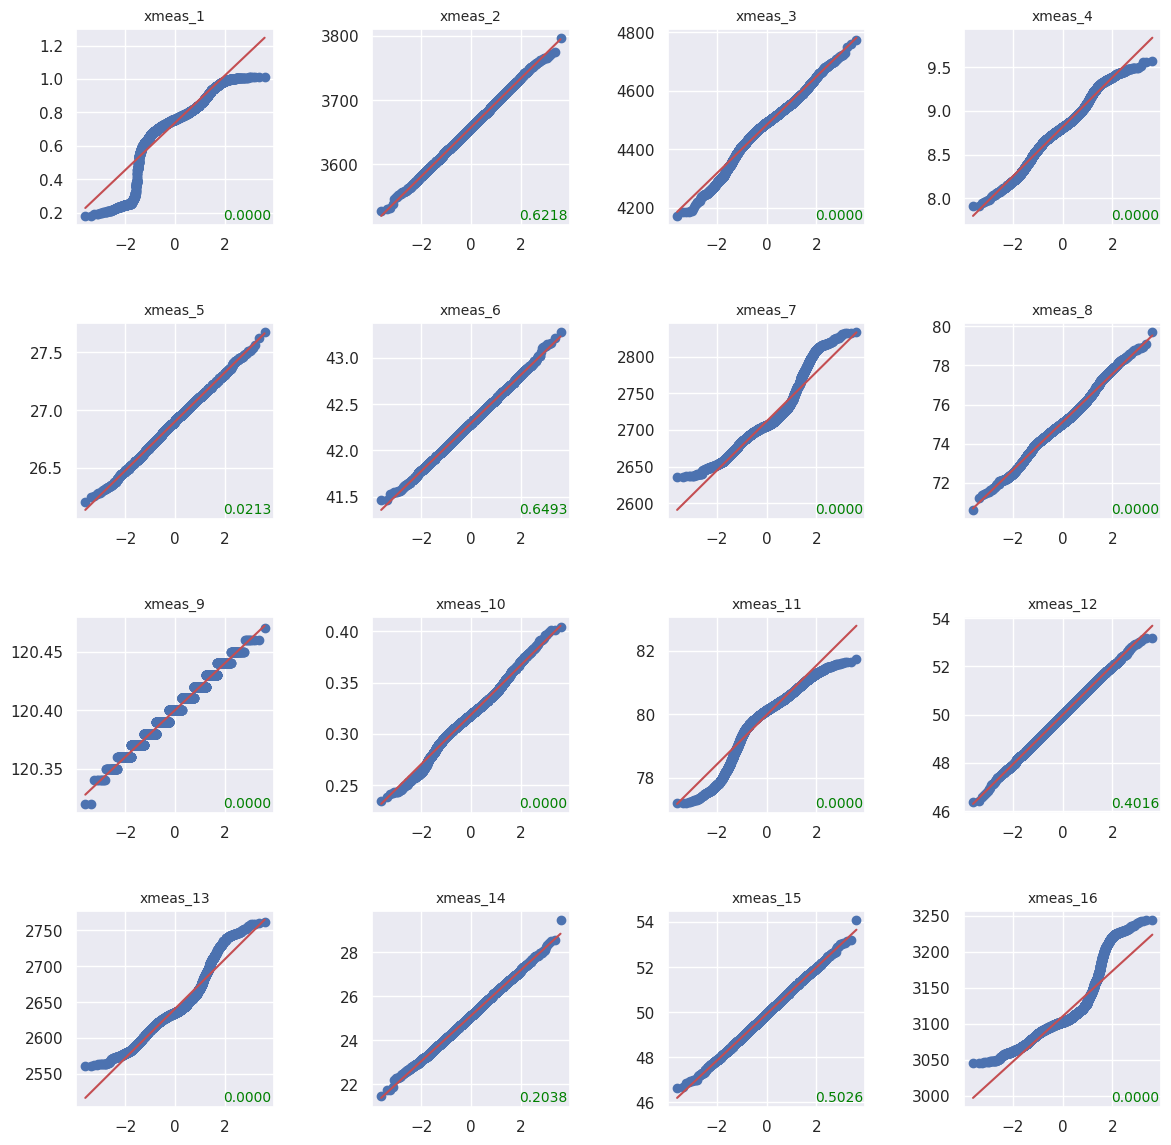

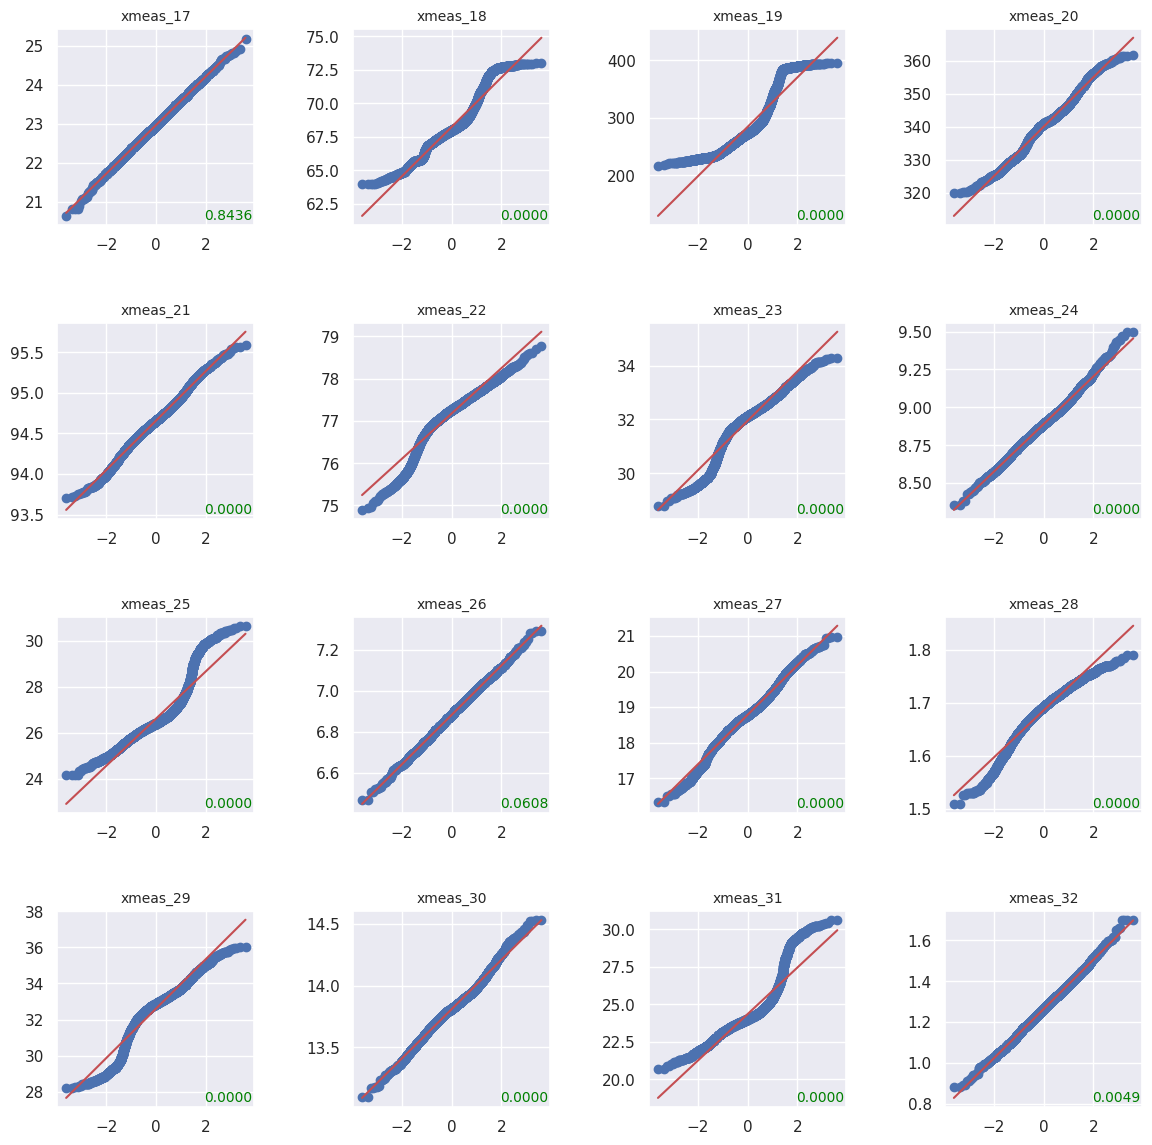

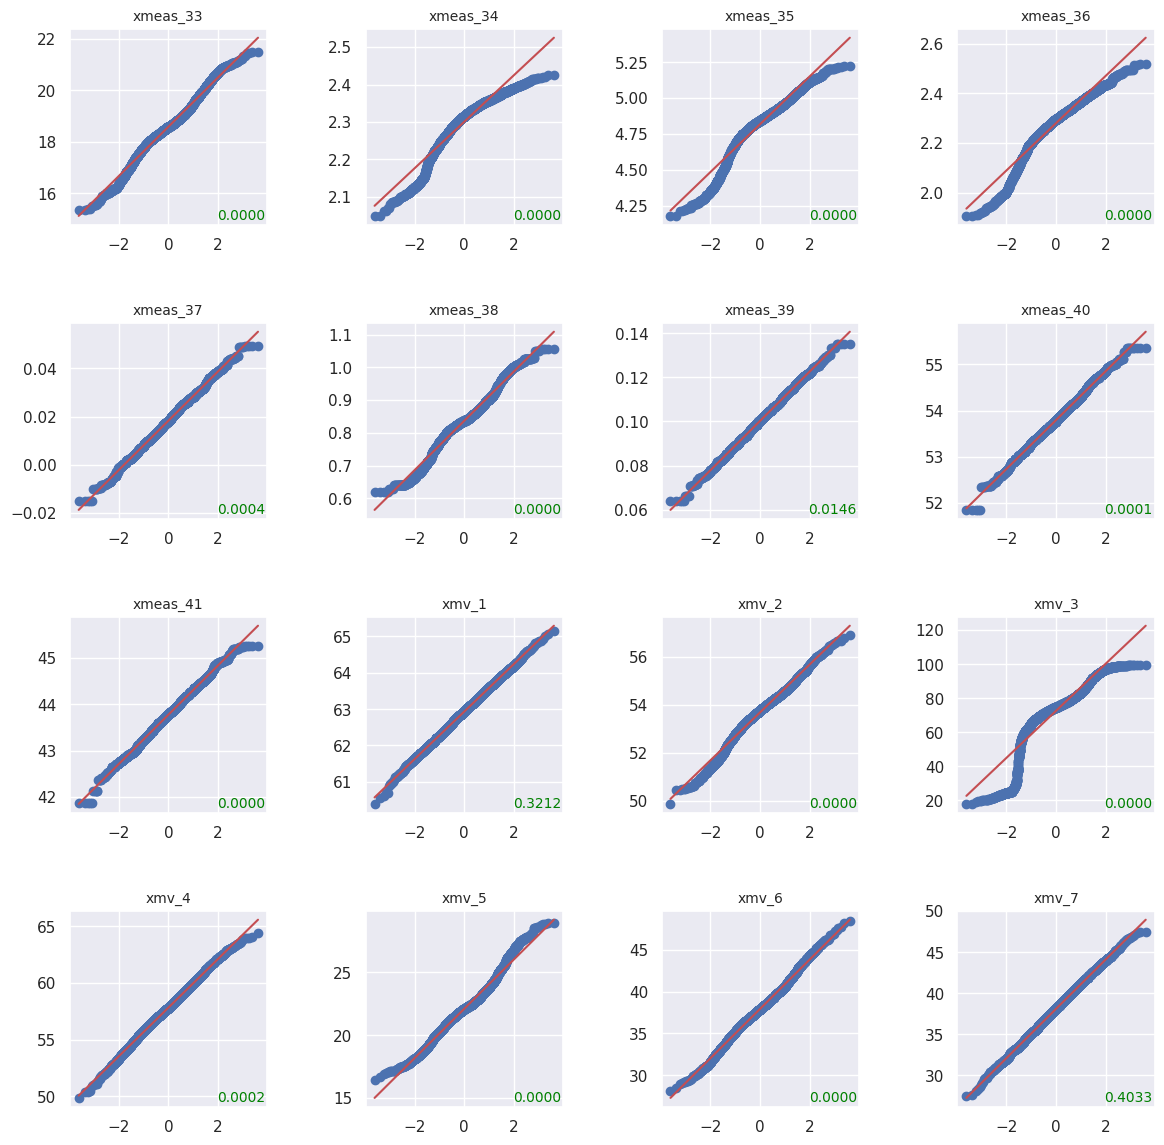

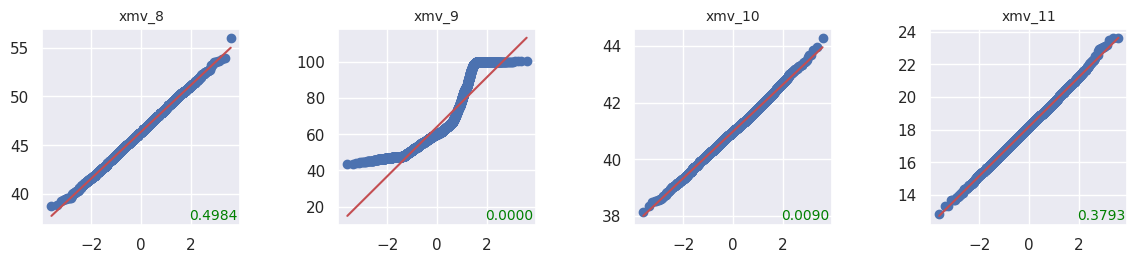

In [ ]:
# plot faulty data

# fault type 1
qqplot_faultwise(test_df, test_df.columns[3:19], faultnum=1)
qqplot_faultwise(test_df, test_df.columns[19:35], faultnum=1)
qqplot_faultwise(test_df, test_df.columns[35:51], faultnum=1)
qqplot_faultwise(test_df, test_df.columns[51:], faultnum=1)

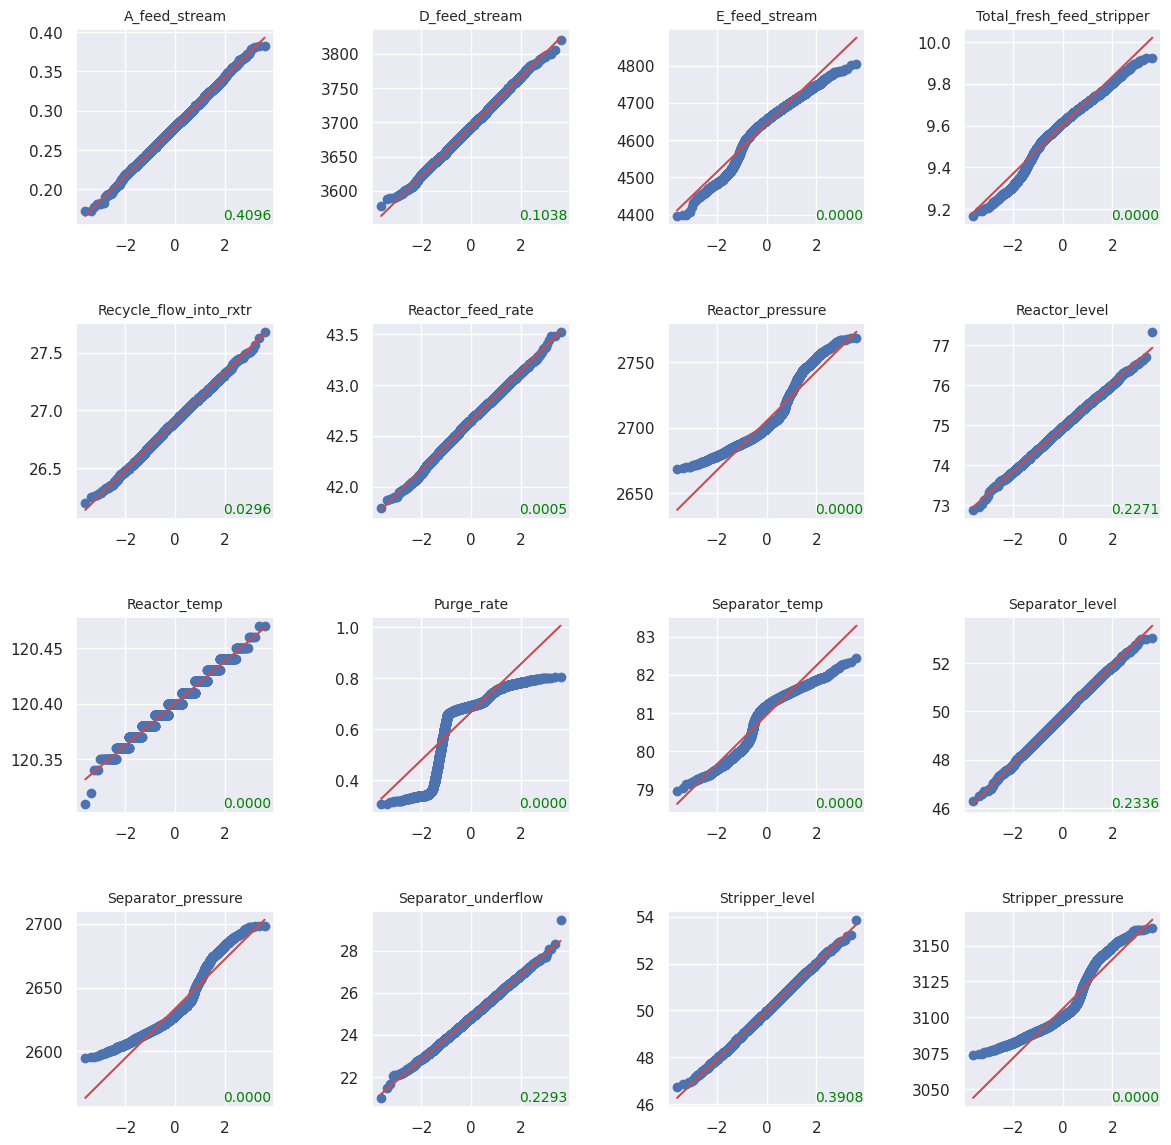

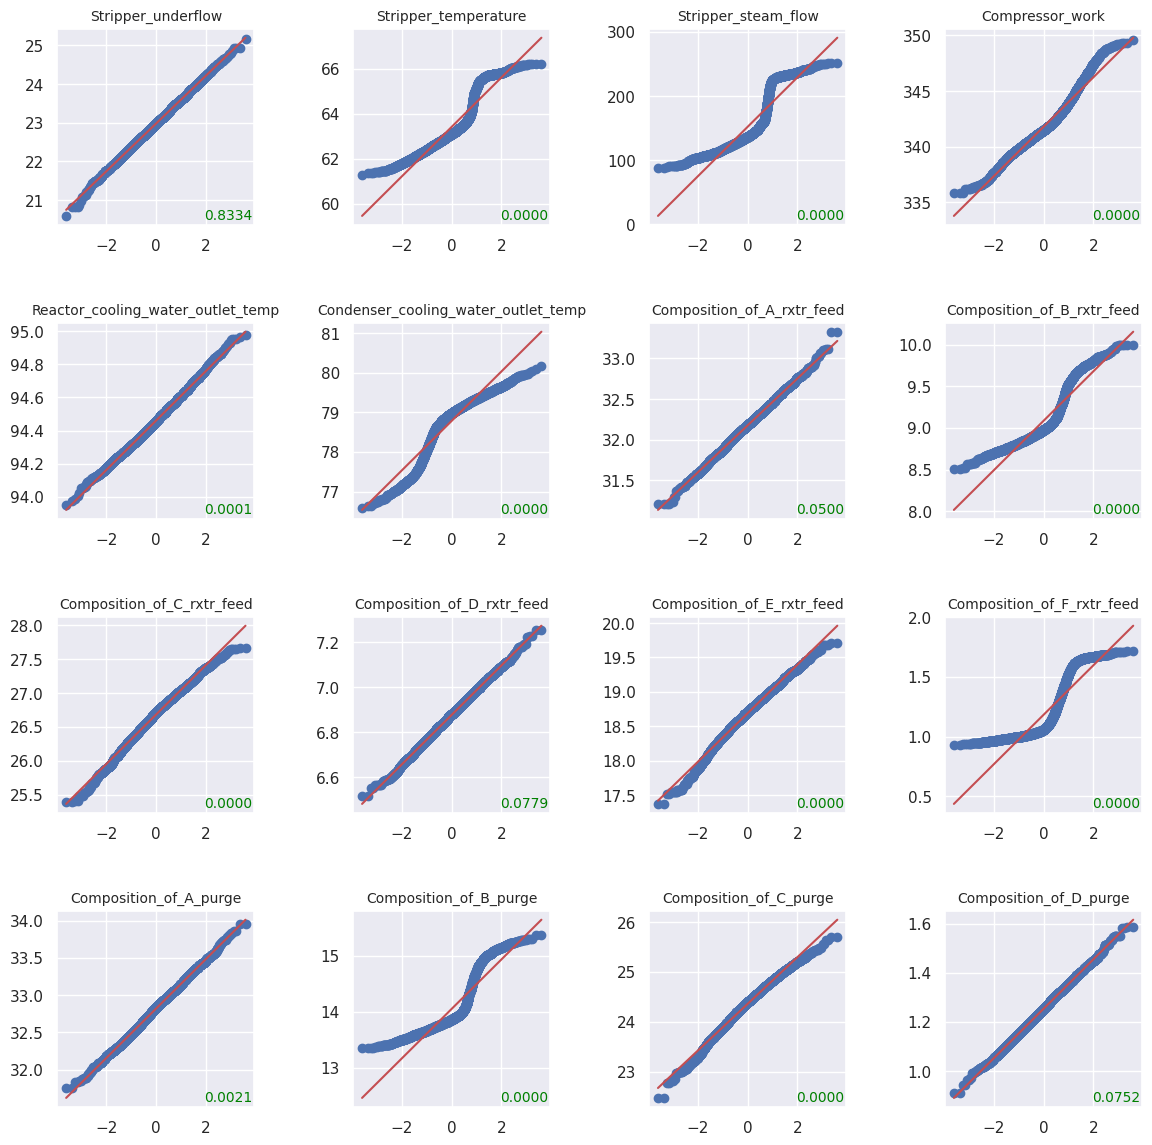

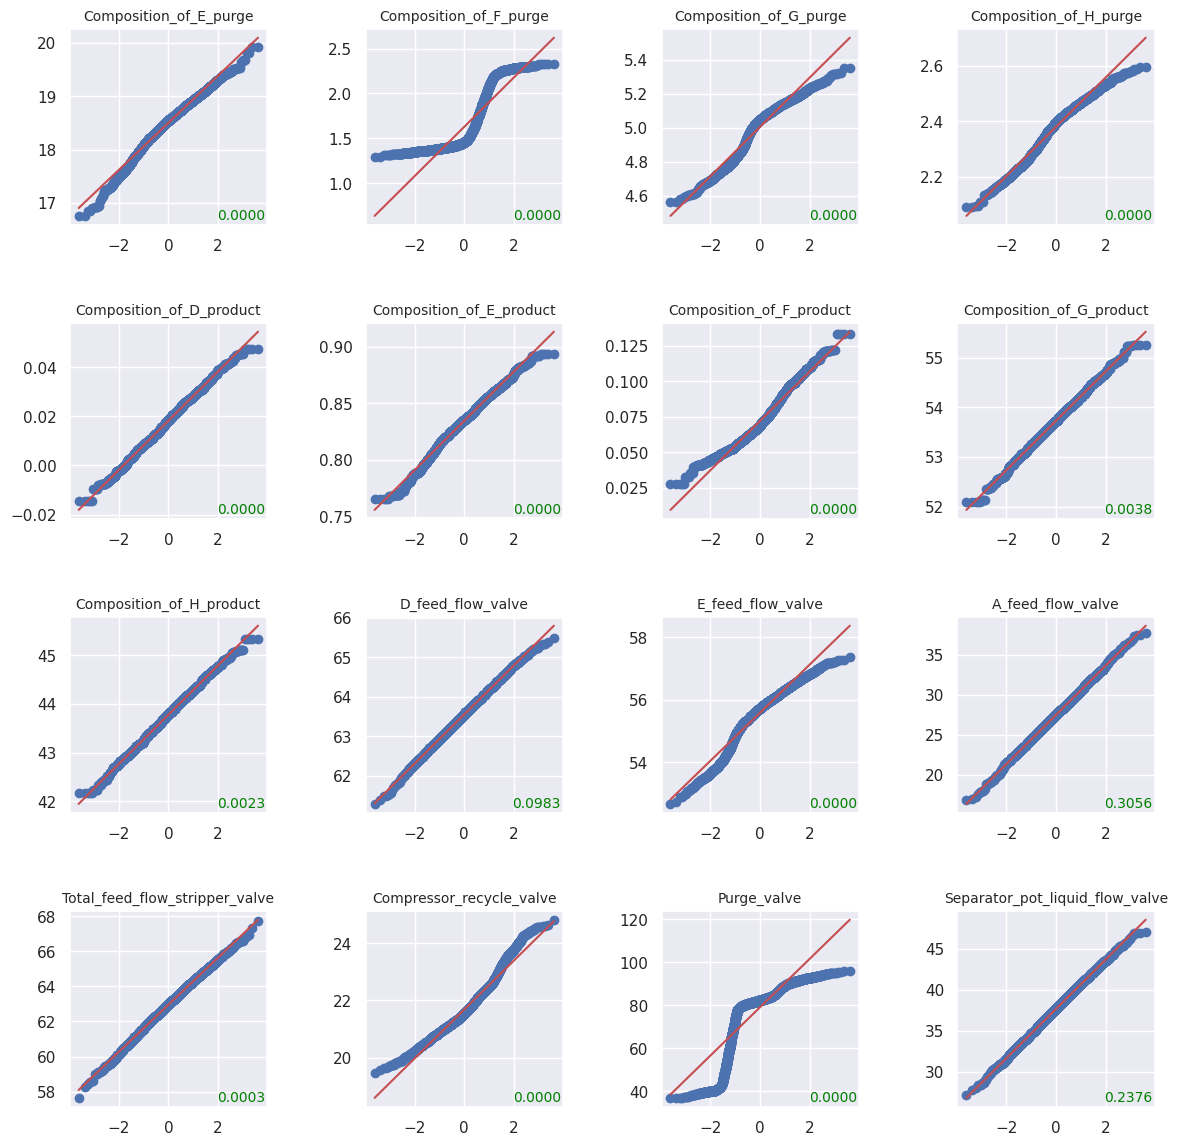

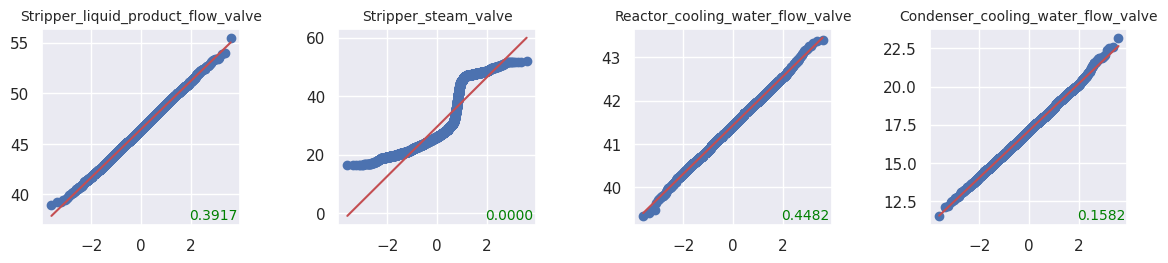

In [ ]:
# fault type 2
qqplot_faultwise(test_df, test_df.columns[3:19], faultnum=2)
qqplot_faultwise(test_df, test_df.columns[19:35], faultnum=2)
qqplot_faultwise(test_df, test_df.columns[35:51], faultnum=2)
qqplot_faultwise(test_df, test_df.columns[51:], faultnum=2)

# also plot for fault type 3,4 etc (change faultnum)

In [ ]:
# Shapiro-Wilk null hypothesis

alpha = 0.05 # significance level

def get_shapiro(DataFrame, cols, faultnum):
    shapiro_history = [] # initiate empty array, append as we go

    for col in range(len(cols)):
        data = DataFrame[(DataFrame.faultNumber == faultnum) &
         (DataFrame.simulationRun.isin(range(9)))][cols[col]]
        shapiro = stats.shapiro(data)
            # returns a tuple
        shapiro_history.append(shapiro)
            # create list of tuples

    return shapiro_history
        # return list of tuples


def plot_shapiro(shapiro_history):

    W, p = zip(*shapiro_history)            # unpack tuples into separate lists
    plt.plot(p)
    plt.axhline(y=alpha, color='r', linestyle='--')
    plt.title(r'$p\  \geq$ {0} for {1} features'.format(alpha, len([i for i in p if i>= alpha])))
    #plt.title(r'$\alpha$ and $\beta$ Plot', fontsize=16)
        # dynamically format the title to show alpha and the count of features with p-values >= alpha
    plt.xlabel('feature')
    plt.ylabel('p-value')

    plt.show()

In [ ]:
train_df

faultNumber  simulationRun  sample   XMEAS1  XMEAS2  XMEAS3  XMEAS4  \
0                 0              1       1  0.25038  3674.0  4529.0  9.2320   
1                 0              1       2  0.25109  3659.4  4556.6  9.4264   
2                 0              1       3  0.25038  3660.3  4477.8  9.4426   
3                 0              1       4  0.24977  3661.3  4512.1  9.4776   
4                 0              1       5  0.29405  3679.0  4497.0  9.3381   
...             ...            ...     ...      ...     ...     ...     ...   
249995            0            500     496  0.29325  3640.1  4473.0  9.1949   
249996            0            500     497  0.29134  3625.7  4506.2  9.2109   
249997            0            500     498  0.29438  3600.2  4478.3  9.1957   
249998            0            500     499  0.25269  3683.5  4486.4  9.2832   
249999            0            500     500  0.25214  3648.2  4467.8  9.1344   

        XMEAS5  XMEAS6  XMEAS7  ...    XMV2    XMV3    XMV4    XMV5    XMV6  \
0       26.889  42.402  2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1       26.721  42.576  2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2       26.875  42.070  2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3       26.758  42.063  2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4       26.889  42.650  2705.1  ...  53.658  28.797  60.717  21.947  39.144   
...        ...     ...     ...  ...     ...     ...     ...     ...     ...   
249995  26.867  42.379  2700.2  ...  53.429  29.249  60.773  21.532  40.451   
249996  26.889  42.291  2700.6  ...  53.830  28.975  61.517  21.750  42.762   
249997  26.820  42.448  2700.3  ...  54.163  28.676  61.656  21.487  42.109   
249998  27.188  42.757  2697.4  ...  53.453  24.889  61.564  21.392  39.334   
249999  26.886  42.534  2695.1  ...  53.676  24.943  61.254  21.208  38.991   

          XMV7    XMV8    XMV9   XMV10   XMV11  
0       42.323  47.757  47.510  41.258  18.447  
1       38.554  43.692  47.427  41.359  17.194  
2       38.990  46.699  47.468  41.199  20.530  
3       38.072  47.541  47.658  41.643  18.089  
4       41.955  47.645  47.346  41.507  18.461  
...        ...     ...     ...     ...     ...  
249995  34.064  48.953  48.291  40.812  18.756  
249996  42.645  51.055  48.589  40.933  19.360  
249997  39.770  46.770  48.648  41.465  19.344  
249998  42.274  43.623  48.797  39.835  18.512  
249999  42.873  44.400  48.876  41.076  16.158  

[250000 rows x 55 columns]

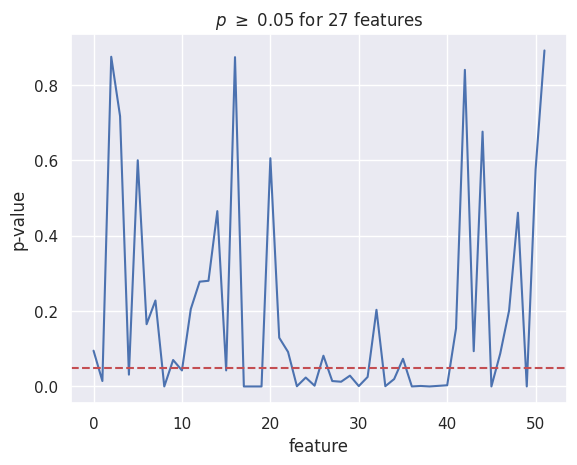

In [ ]:
# Shapiro-Wilk plot for fault-free conditions

fault_free_shapiro = get_shapiro(train_df, train_df.columns[3:55], faultnum=0)
plot_shapiro(fault_free_shapiro)

In [ ]:
len(fault_free_shapiro)

52

In [ ]:
# what values have a normal distribution?

W_fault_free, p_fault_free = zip(*fault_free_shapiro)

fault_free_cond = pd.DataFrame(index = train_df.columns[3:55], columns=['isNormal']).fillna(False)
    # in simple terms: create a table showing what values are probably normally distributed

i = 0
for p in p_fault_free:
    if p >= alpha:
        fault_free_cond.iloc[i] = True
    i = i + 1

fault_free_cond

isNormal
XMEAS1       True
XMEAS2      False
XMEAS3       True
XMEAS4       True
XMEAS5      False
XMEAS6       True
XMEAS7       True
XMEAS8       True
XMEAS9      False
XMEAS10      True
XMEAS11     False
XMEAS12      True
XMEAS13      True
XMEAS14      True
XMEAS15      True
XMEAS16     False
XMEAS17      True
XMEAS18     False
XMEAS19     False
XMEAS20     False
XMEAS21      True
XMEAS22      True
XMEAS23      True
XMEAS24     False
XMEAS25     False
XMEAS26     False
XMEAS27      True
XMEAS28     False
XMEAS29     False
XMEAS30     False
XMEAS31     False
XMEAS32     False
XMEAS33      True
XMEAS34     False
XMEAS35     False
XMEAS36      True
XMEAS37     False
XMEAS38     False
XMEAS39     False
XMEAS40     False
XMEAS41     False
XMV1         True
XMV2         True
XMV3         True
XMV4         True
XMV5        False
XMV6         True
XMV7         True
XMV8         True
XMV9        False
XMV10        True
XMV11        True

In [ ]:
# Shapiro-Wilk test for faults of all types

combined_shapiro = [] # initiate empty array, append as we go

for fault in range(1,21):

    shapiro = get_shapiro(test_df, test_df.columns[3:55], faultnum = fault)

    combined_shapiro.append(shapiro)



In [ ]:
fault_numbers = []

skewed_features = pd.DataFrame(index = train_df.columns[3:55], columns=['frequency']).fillna(0)

for i in range(20):

    W_skew, p_skew = zip(*combined_shapiro[i])
    p_count = len([p for p in p_skew if p >= alpha])
        # build a list of p-values that are greater than alpha, the threshold 0.05
        # what is the len() of this list?
        # i.e. how many p-values are greater than 0.05?
        # i.e. among these skewed features, how many values are still normal?

    # if a feature has less than 20 normal values, consider it a fault
    if (p_count < 20):
        fault_numbers.append(i+1)

    # frequency = how many p values are less than alpha?
    feature_number = 0
    for p in p_skew:
        if p < alpha:
            skewed_features.iloc[feature_number] += 1
        feature_number += 1

skewed_features

frequency
XMEAS1          11
XMEAS2          13
XMEAS3           9
XMEAS4          10
XMEAS5          18
XMEAS6           6
XMEAS7          14
XMEAS8           8
XMEAS9          20
XMEAS10         11
XMEAS11         14
XMEAS12          2
XMEAS13         14
XMEAS14          3
XMEAS15          2
XMEAS16         18
XMEAS17          2
XMEAS18         20
XMEAS19         20
XMEAS20         20
XMEAS21         14
XMEAS22         11
XMEAS23         11
XMEAS24         19
XMEAS25         20
XMEAS26         16
XMEAS27         11
XMEAS28         19
XMEAS29         19
XMEAS30         17
XMEAS31         19
XMEAS32         17
XMEAS33         11
XMEAS34         19
XMEAS35         18
XMEAS36         12
XMEAS37         20
XMEAS38         20
XMEAS39         20
XMEAS40         20
XMEAS41         20
XMV1             4
XMV2             9
XMV3            10
XMV4             9
XMV5            19
XMV6             9
XMV7             2
XMV8             2
XMV9            20
XMV10           13
XMV11            4

Fault type: 1


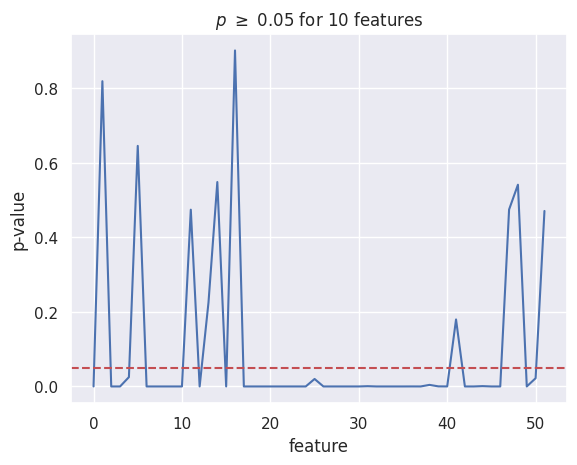


Fault type: 2


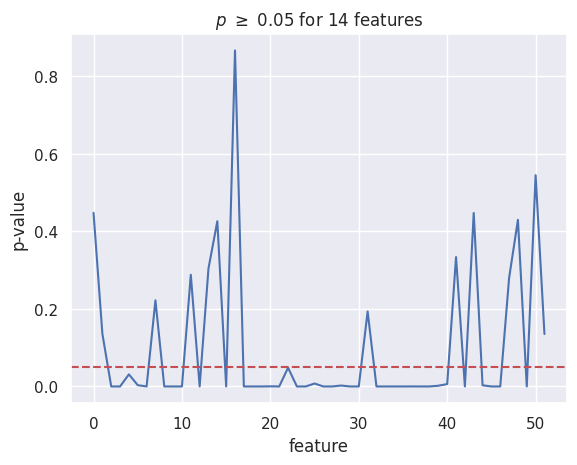


Fault type: 3


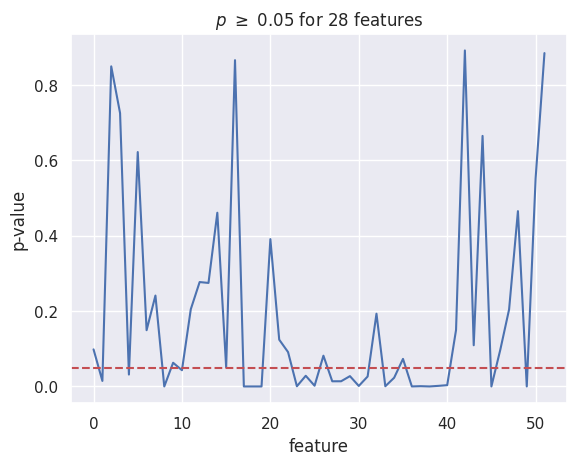


Fault type: 4


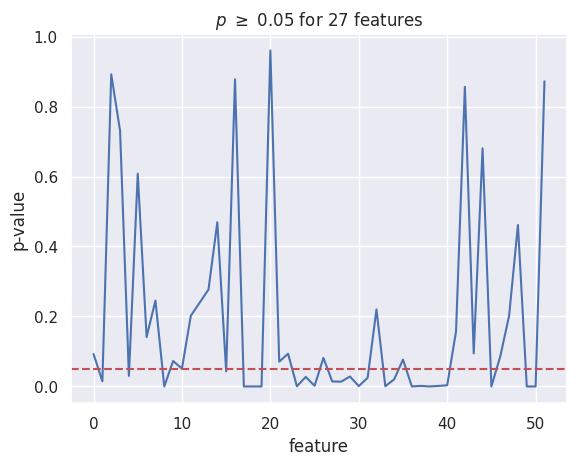


Fault type: 5


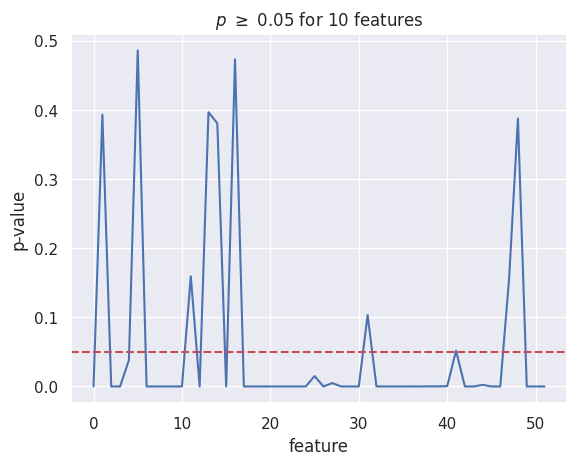


Fault type: 6


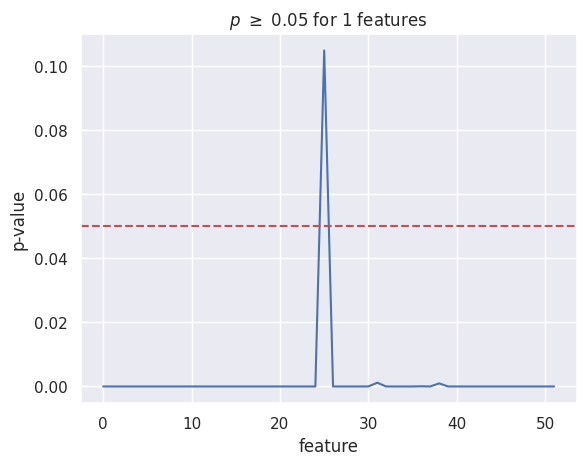


Fault type: 7


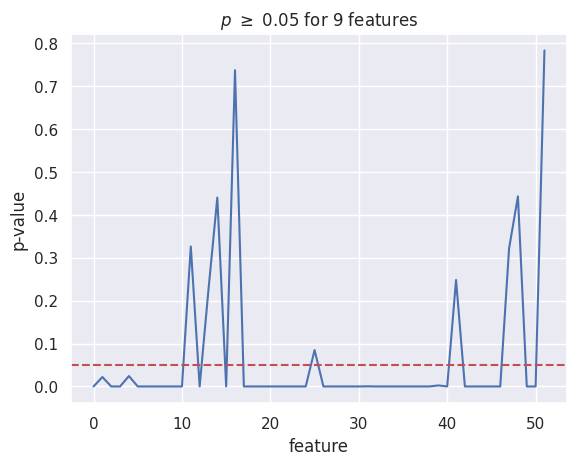


Fault type: 8


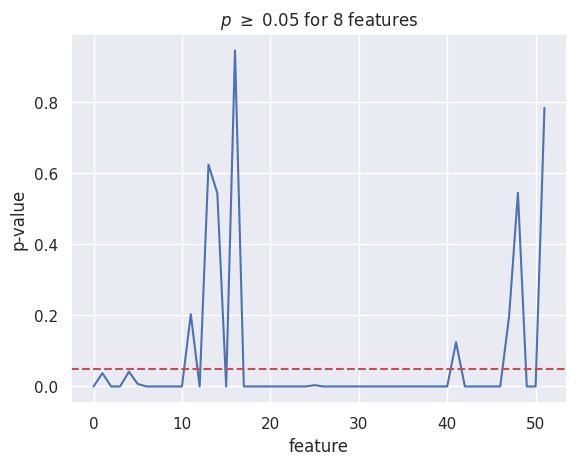


Fault type: 9


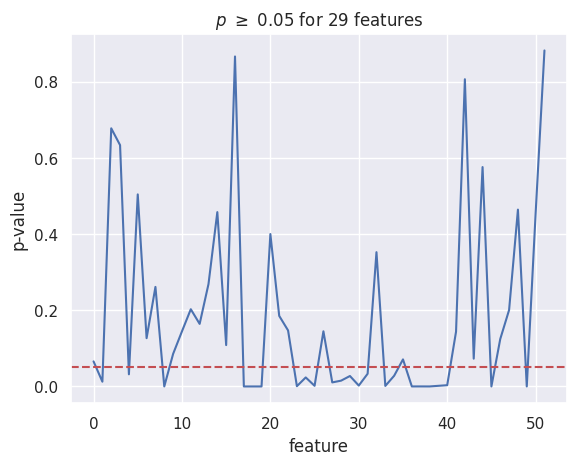


Fault type: 10


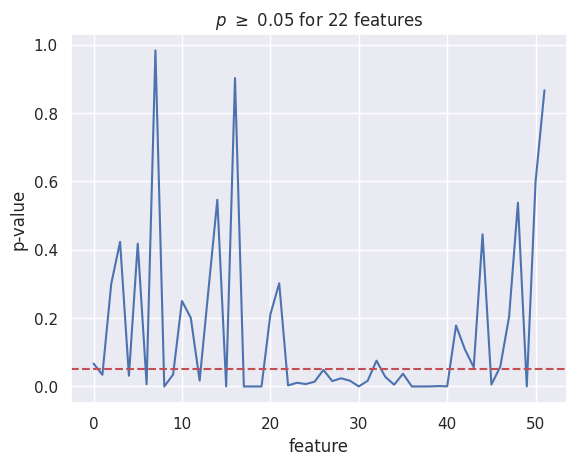


Fault type: 11


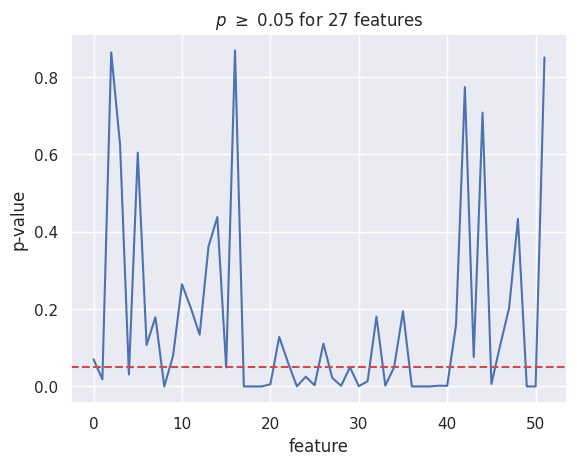


Fault type: 12


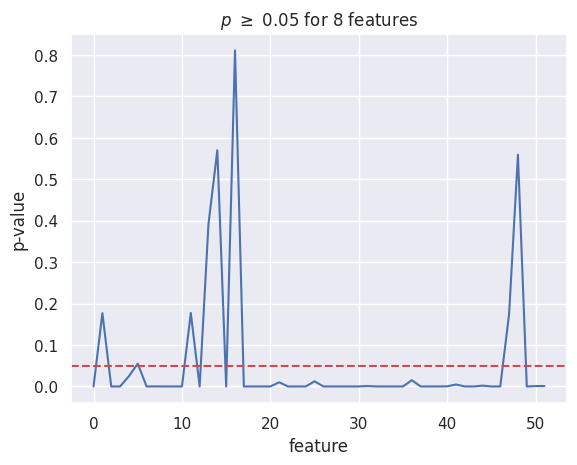


Fault type: 13


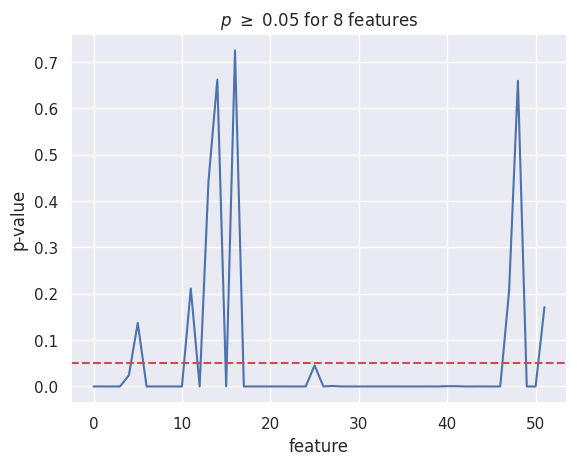


Fault type: 14


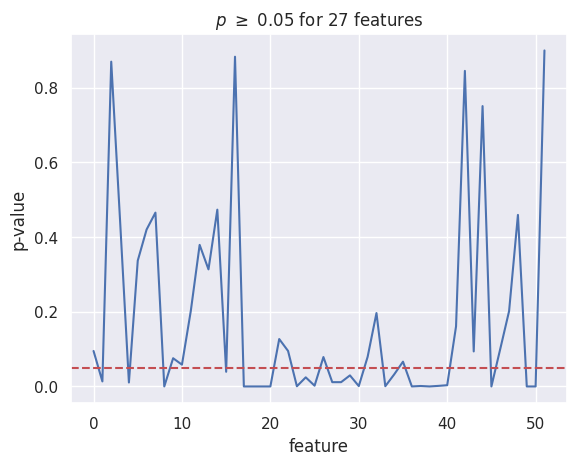


Fault type: 15


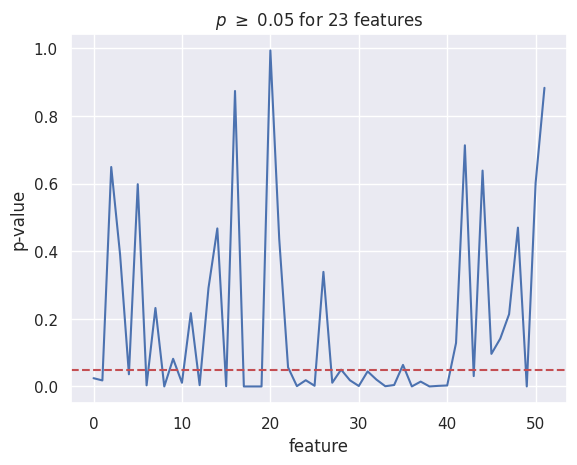


Fault type: 16


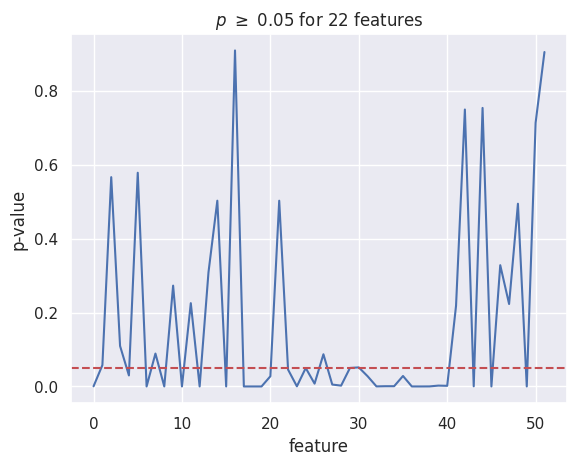


Fault type: 17


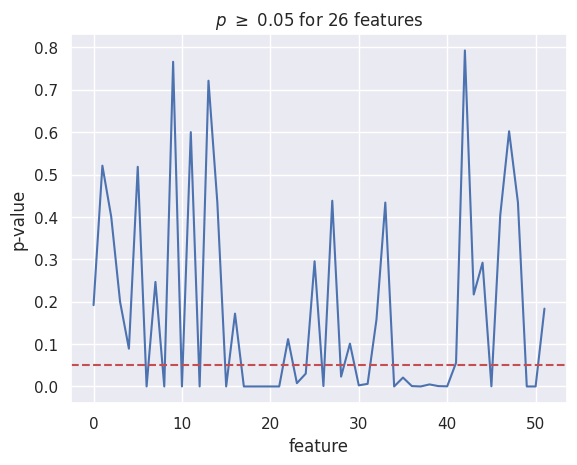


Fault type: 18


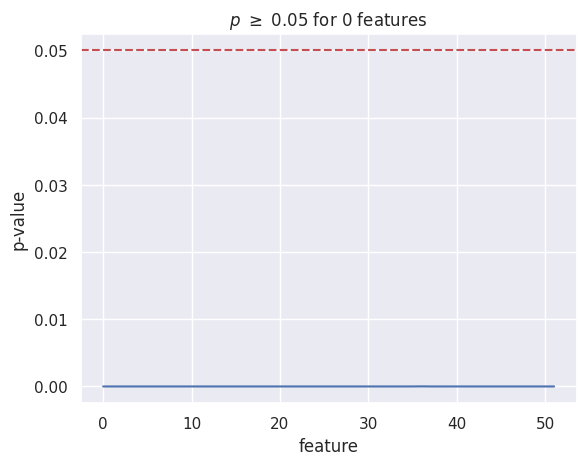


Fault type: 19


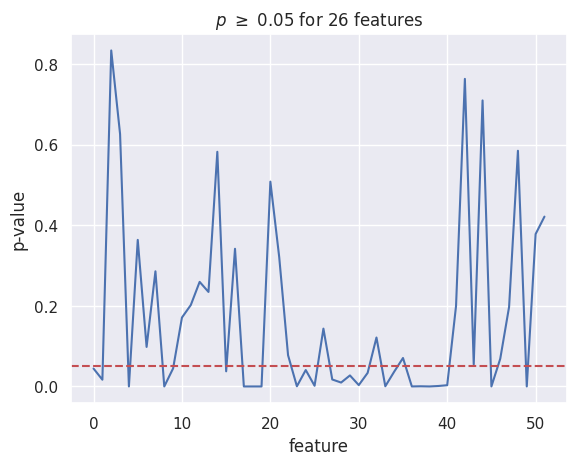


Fault type: 20


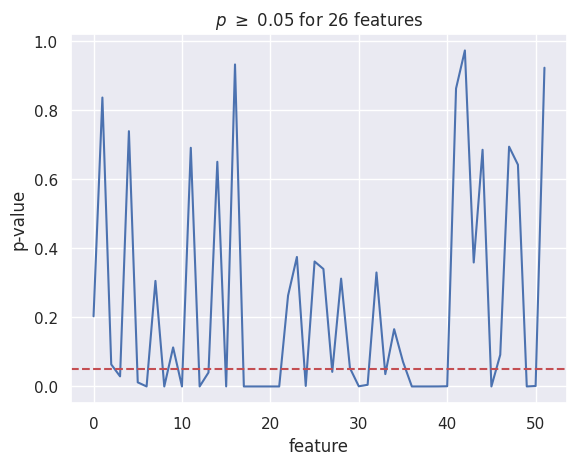

In [ ]:
# Shapiro-Wilk plot for faulty data

for fault in range(1,21):
    print('Fault type: {0}'.format(fault))
    faulty_shapiro = get_shapiro(test_df, test_df.columns[3:55], faultnum = fault)
    plot_shapiro(faulty_shapiro)
    print()

# the outputs say, some faults are normally distributed and can be detected with the statistical method, others cannot

# **PROBABILISTIC MODEL**

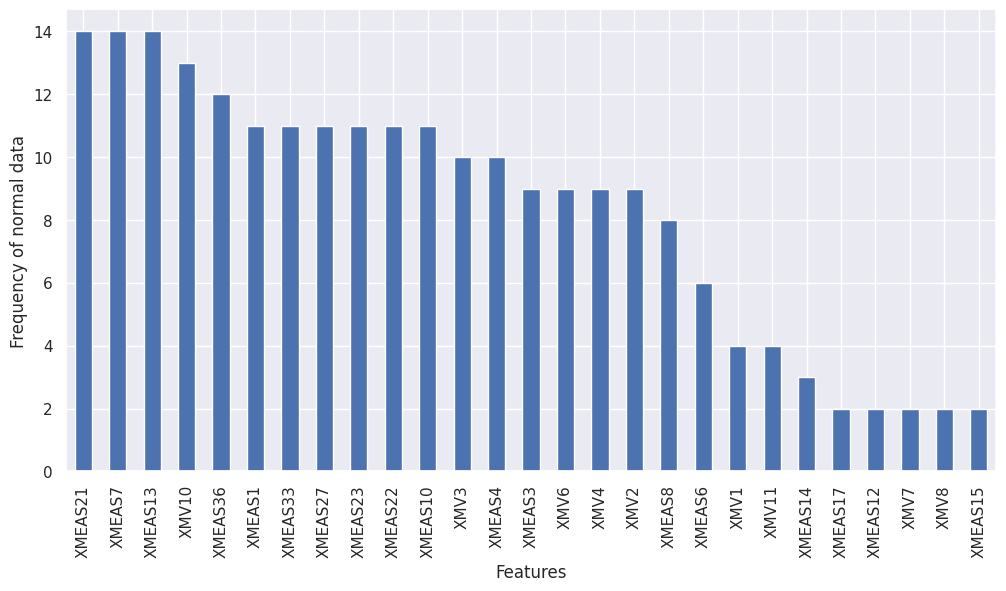

In [ ]:
plt.figure(figsize=(12,6))
#skewed_features[fault_free_cond.isNormal.values].frequency.sort_values(ascending = False).plot(kind='bar')

select_columns = skewed_features[fault_free_cond.isNormal.values]
    # select columns where isNormal is true, i.e. the values are normally distributed

frequency = select_columns.frequency
    # select the 'frequency' column

frequency = frequency.sort_values(ascending=False)
    # sort frequencies in descending order

frequency.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Frequency of normal data')
plt.show()

In [ ]:
n_features = 10
    # selects the top features in terms of frequency of normal data

select_features = skewed_features[fault_free_cond.isNormal]
    # select the normal values from skewed features

sort_features = select_features.frequency.sort_values(ascending=False)
    # sort values by frequency in descending order

disp_features = sort_features.head(n_features)
    # display this many features

feature_cols = disp_features.index.values
    # get feature names


In [ ]:
feature_cols

array(['XMEAS21', 'XMEAS7', 'XMEAS13', 'XMV10', 'XMEAS36', 'XMEAS1',
       'XMEAS33', 'XMEAS27', 'XMEAS23', 'XMEAS22'], dtype=object)

In [ ]:
# scale these features for more stable parameters
# from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(X =
  train_df[(train_df.faultNumber == 0) &
 (train_df.simulationRun.isin(range(400)))].loc[:,feature_cols]))
    # from train_df, extract "feature_cols" (see previous cell) data where faultNumber = 0 and for 400 simulation runs

means = data.mean()
variances = data.std()

model_features = pd.DataFrame(index=feature_cols,
  data={'mean':means.values,
  'variance':variances.values})
    # generate a table for feature_cols with means and variances

model_features



mean  variance
XMEAS21  0.490483  0.110456
XMEAS7   0.490172  0.113015
XMEAS13  0.493977  0.111739
XMV10    0.471319  0.101071
XMEAS36  0.500548  0.120703
XMEAS1   0.475455  0.114972
XMEAS33  0.477033  0.114613
XMEAS27  0.522407  0.122750
XMEAS23  0.497545  0.118902
XMEAS22  0.505249  0.113515

Gaussian distribution:

$f(x)=\frac{1}{\sqrt{2\pi} \cdot \sigma} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}}$



In [ ]:
'''
To evaluate the new datapoint, we calculate the probability for each feature included in the model
and return the product of probabilities. This gives the probability of obtaining the given data point,
i.e. 'How probable is this data?'

Why ask 'How probable'? Because we're 'scaling' the data. We want to quantify the likelihood that this
combination occurs in the data.
'''

def gaussian(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp((-(x-mu)**2)/(2*(sigma**2)))

def get_probability(x, model):
    results = gaussian(x.values, model['mean'].values, model['variance'].values)
        # calculate gaussian distribution for whatever model we feed
    return results.prod()
        # the joint probability is the product of all probabilities

def alert_condition(x):
    return np.max(x)

def metric_probability(dataframe, window_minutes, threshold):

    # let's sample every 3 minutes
    window_points = window_minutes//3 # floor division
    rolling_maximum = dataframe.rolling(window=window_points).apply(alert_condition, raw=True)
        # creates a rolling window
        # e.g. converts [10, 20, 30, 40, 50] to [10, 20, 30], [20, 30, 40], [30, 40, 50]
        # applies alert_condition function to each rolling window
        # alert_condition returns the maximum for a rolling window
        # raw=True means that the alert_condition function receives the entire rolling window as an input
        # finally returns a rolling maximum for windows

    ind = np.where(rolling_maximum < threshold)
        # in what indices of rolling_maximum are the values less than the threshold?

    if len(ind[0]) > 0:
        return ind[0][0] # return index of first occurence
    else:
        return 0
# basically, this function identifies the first occurence of where the rolling maximum of a given dataframe falls below the threshold


[44, 44]


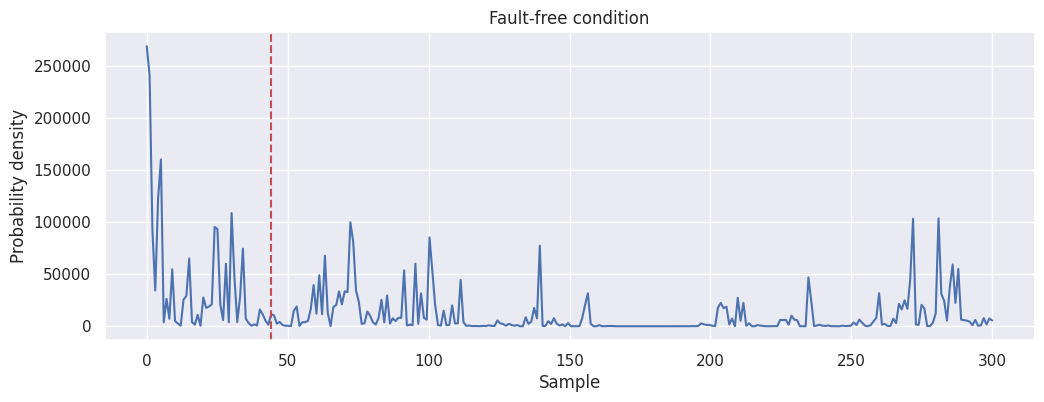

[25, 25]


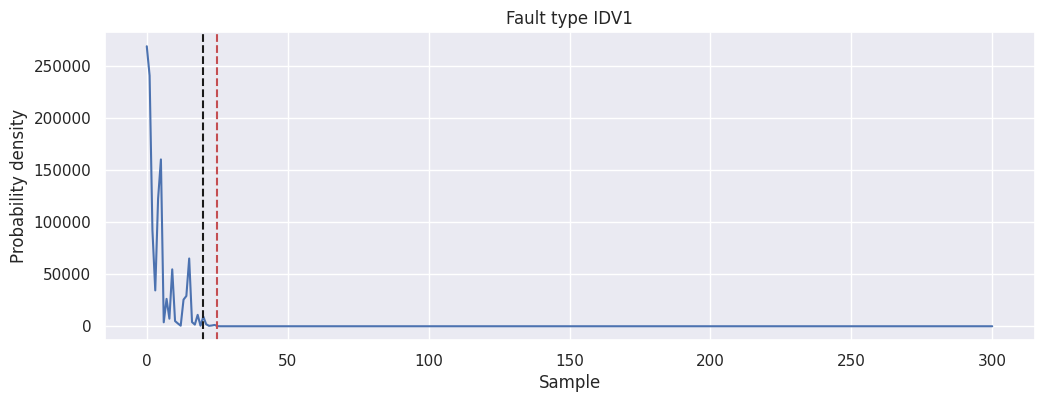

[35, 35]


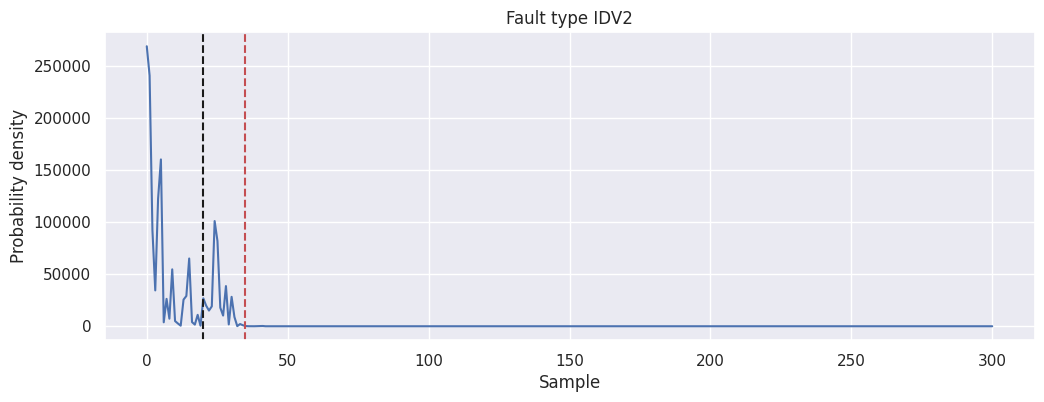

[44, 44]


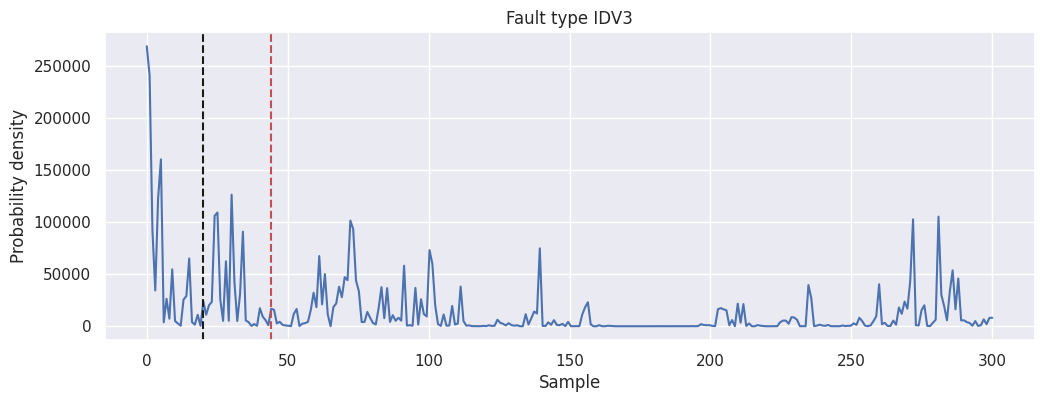

[25, 25]


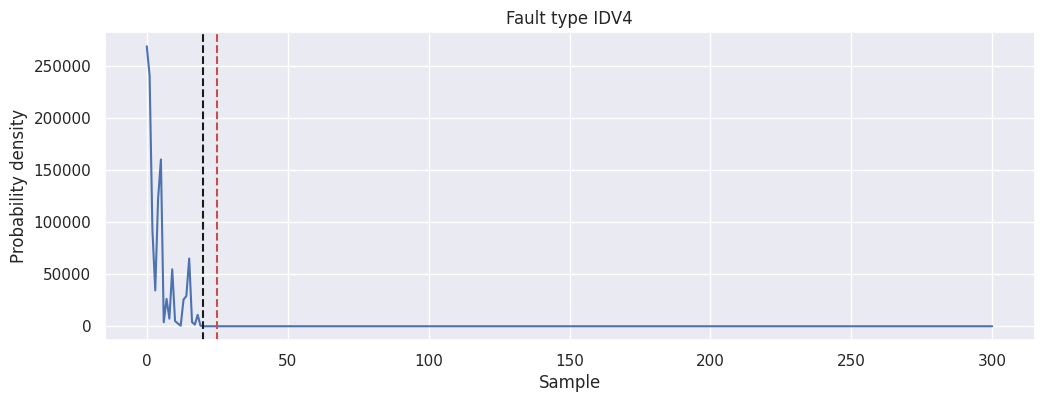

[25, 25]


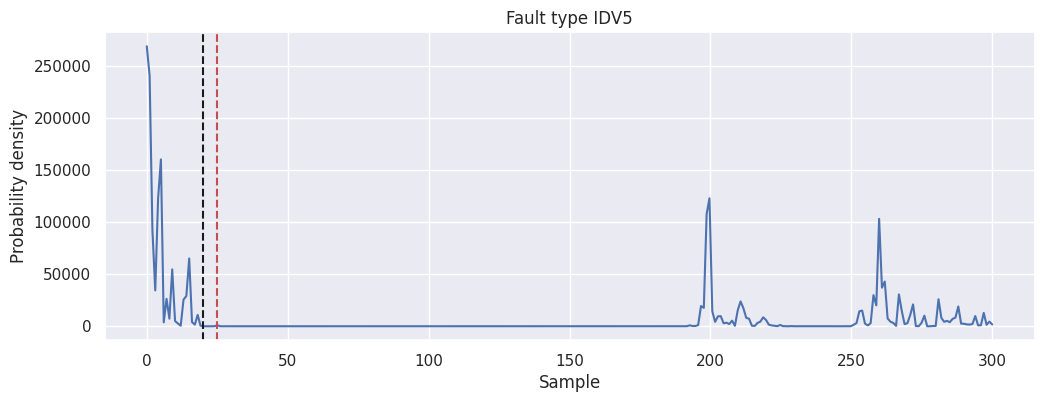

[25, 25]


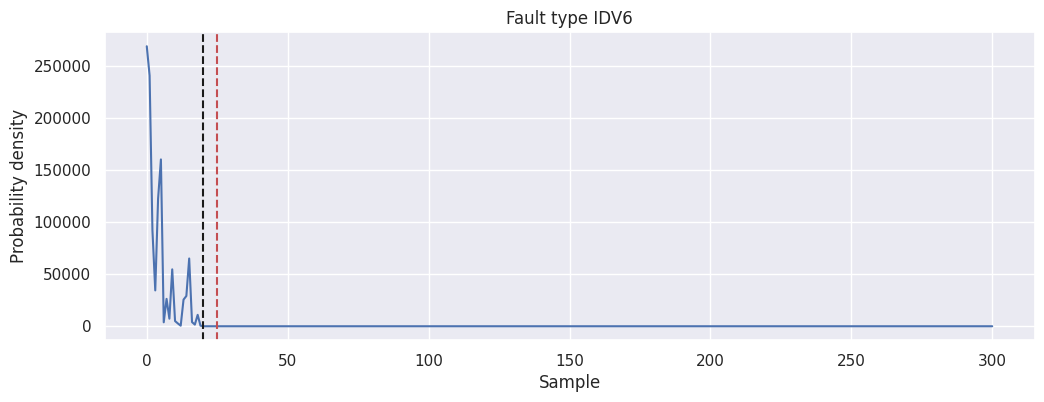

[25, 25]


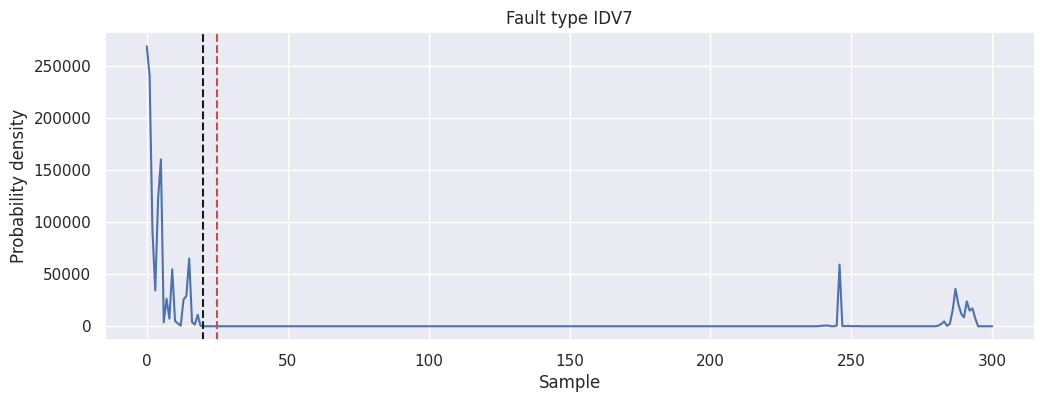

[35, 35]


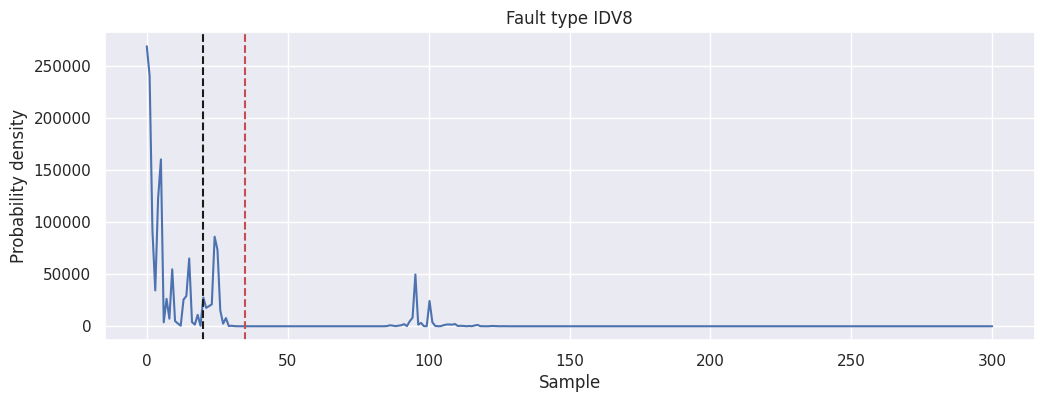

[44, 44]


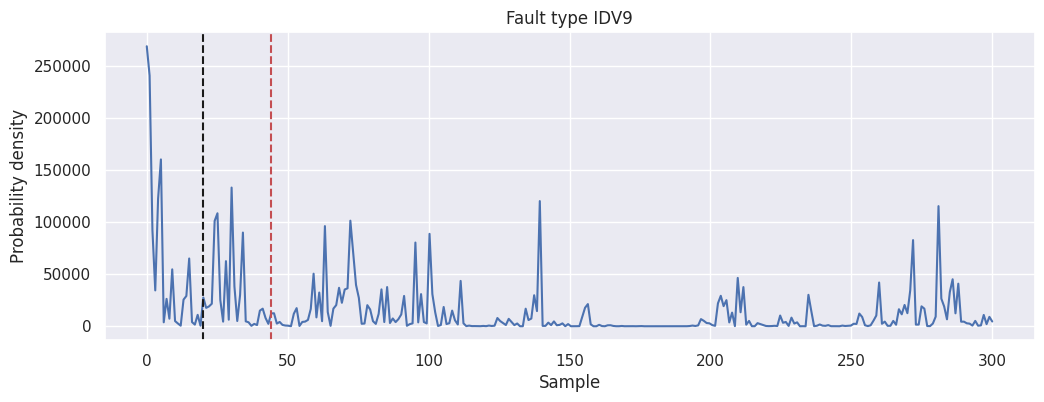

[44, 44]


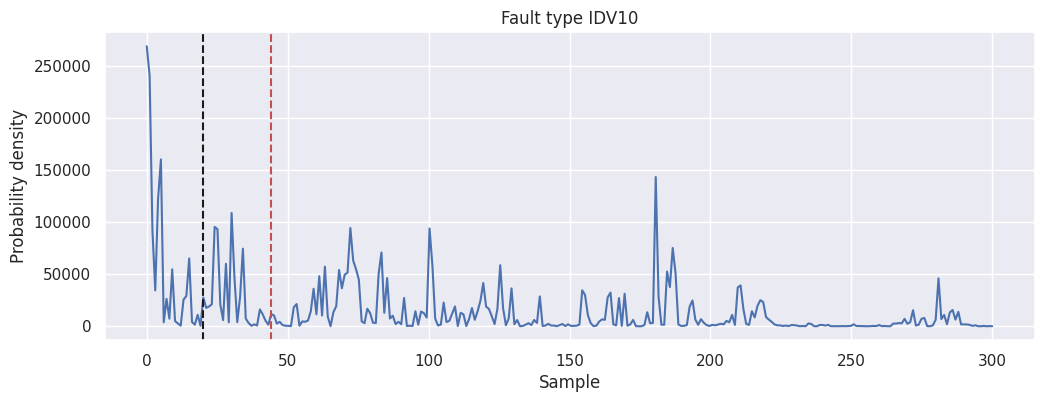

[25, 25]


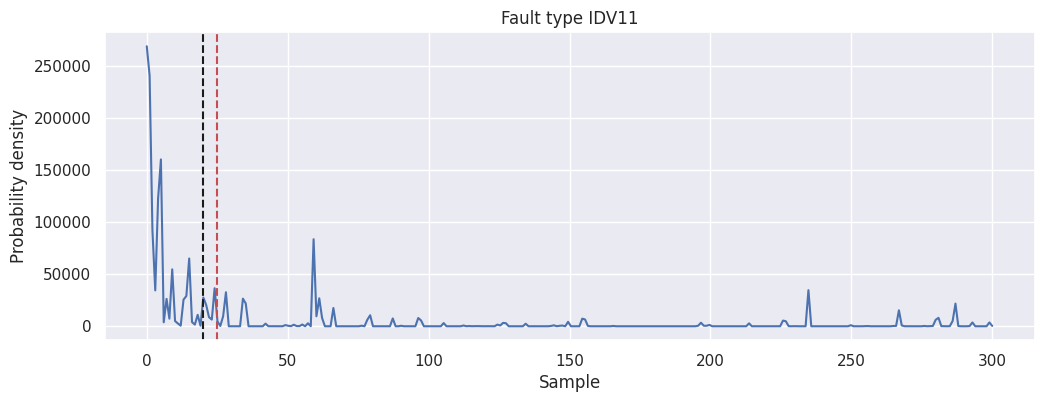

[25, 25]


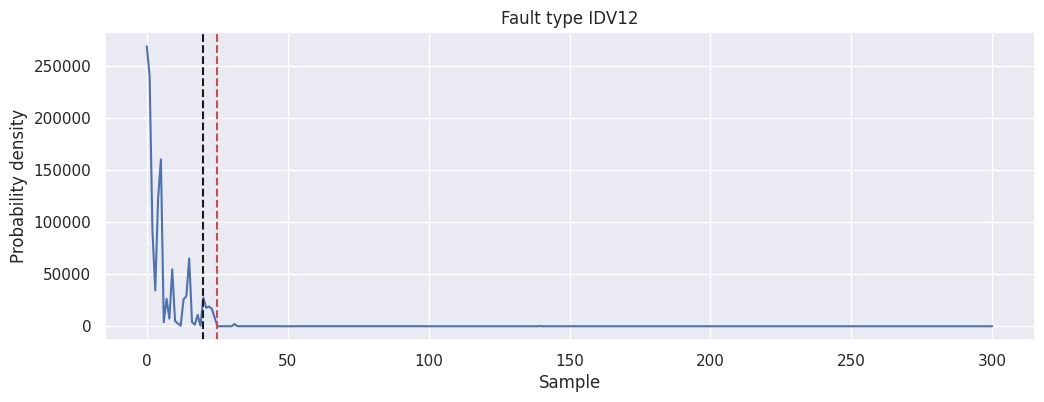

[44, 44]


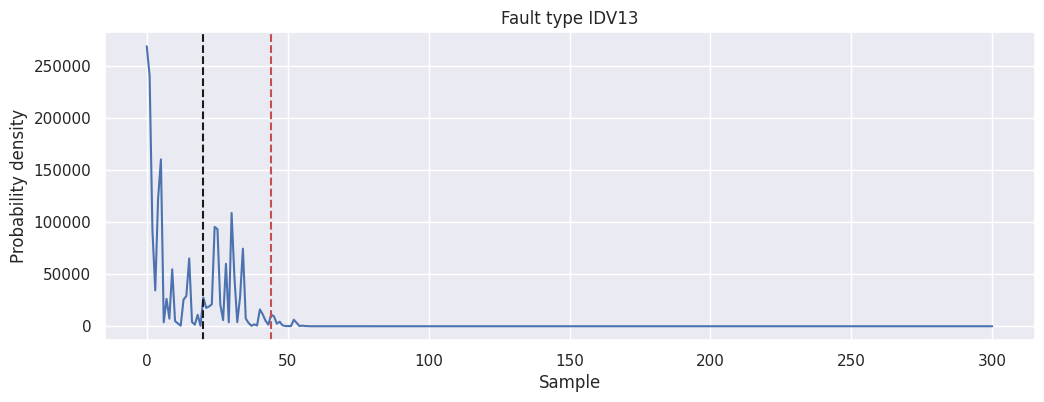

[25, 25]


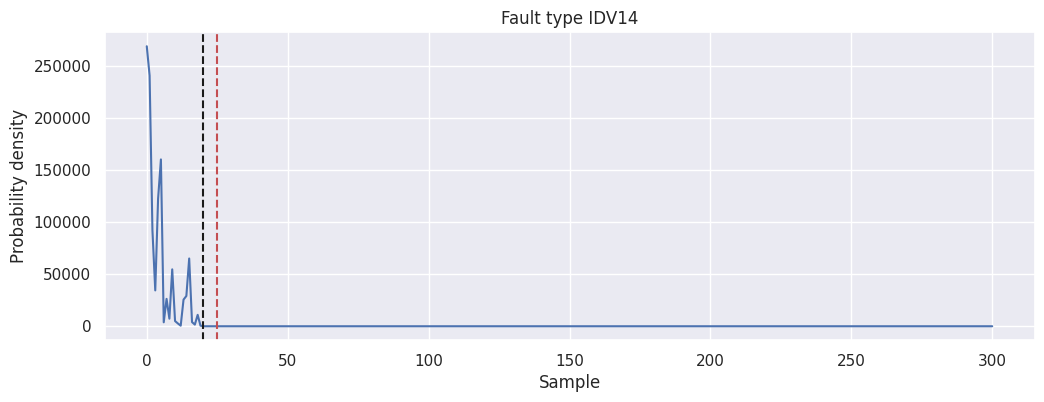

[44, 44]


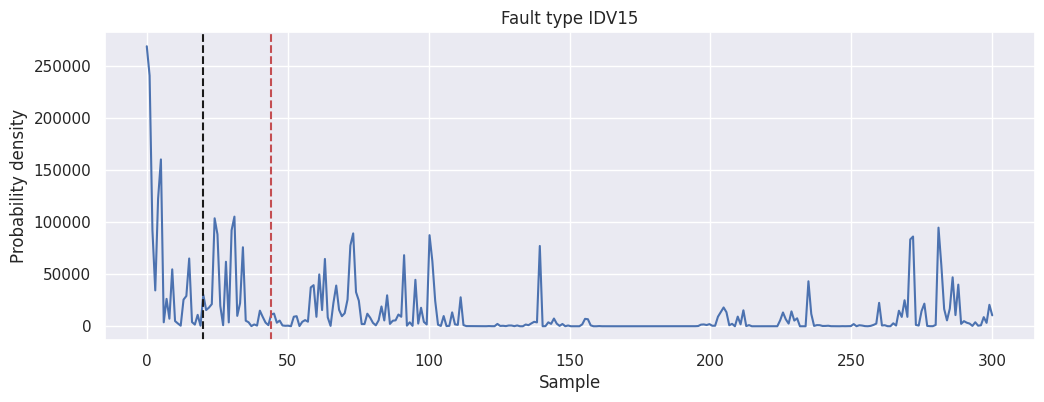

[44, 44]


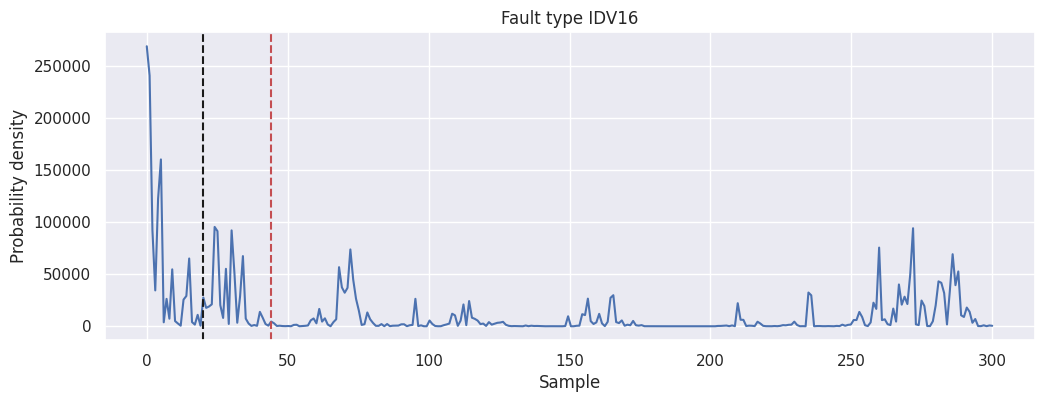

[38, 38]


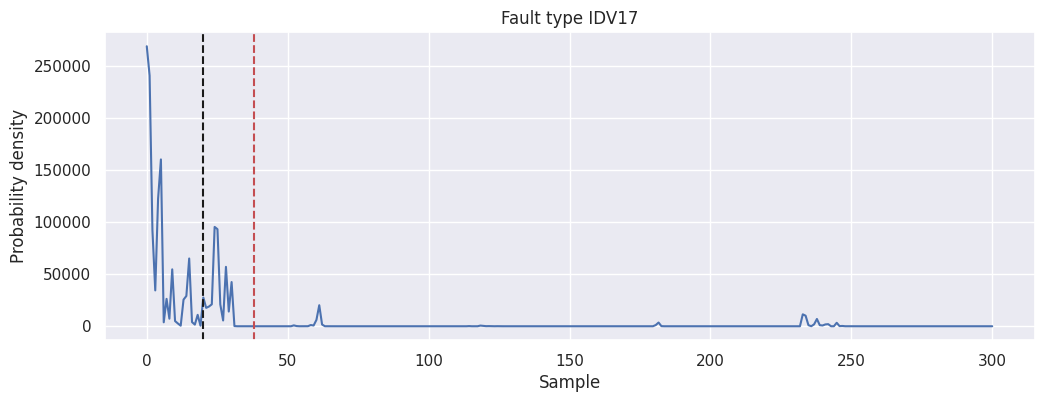

[44, 44]


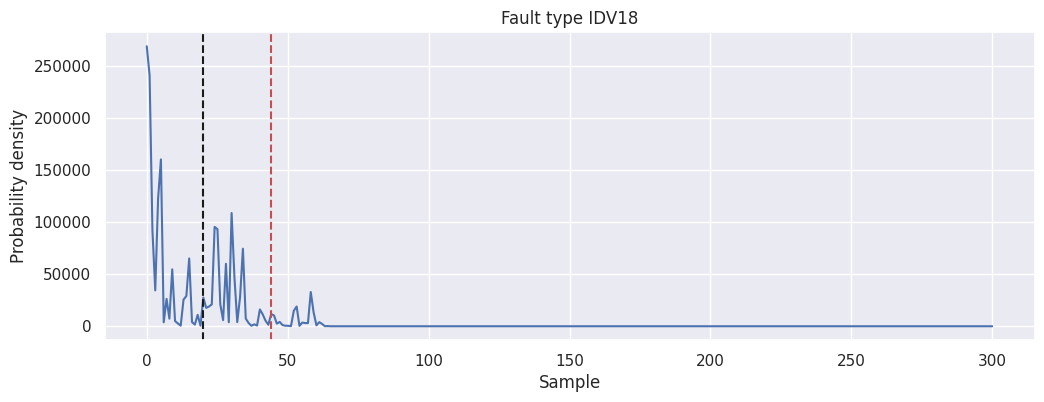

[34, 34]


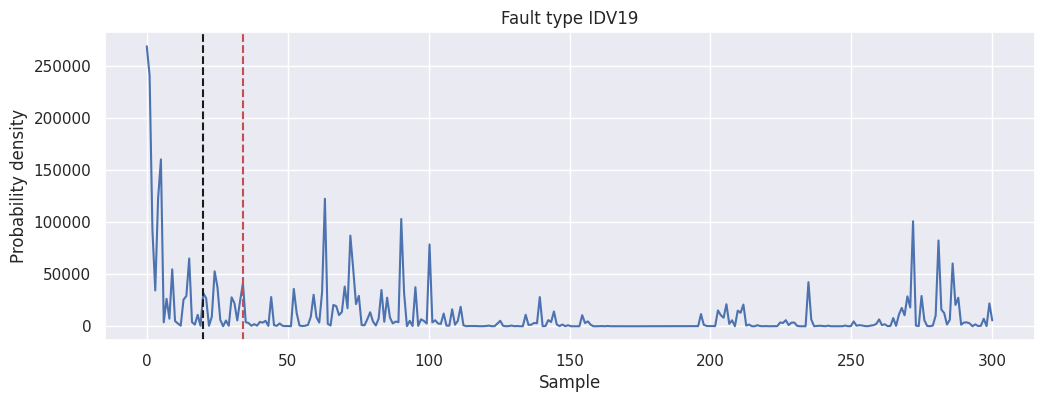

[44, 44]


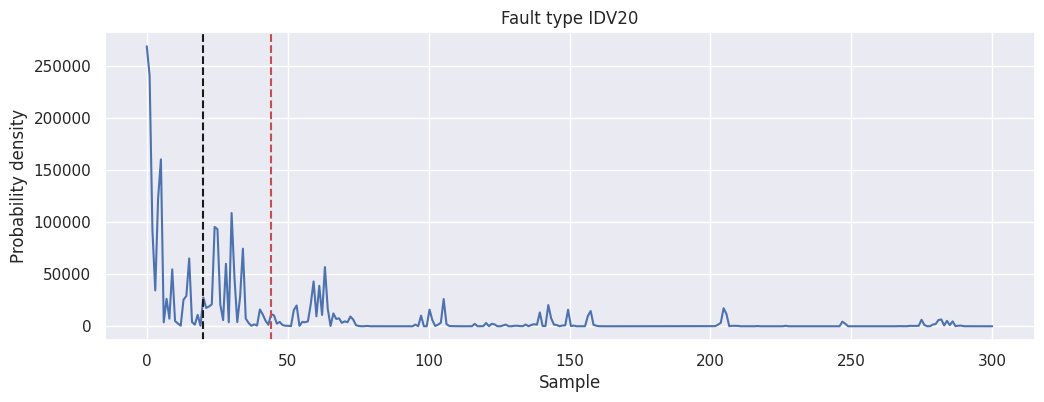

In [ ]:
alarm_sample = []


for fault in range(21):
    plt.figure(figsize=(12,4))

    if fault == 0:
        df = train_df
        plotTitle = 'Fault-free condition'
        faultlineplot = False
    else:
        df = test_df
        plotTitle = 'Fault type IDV{0}'.format(fault)
        faultlineplot = True

    scaled = pd.DataFrame(scaler.transform(df[(df.faultNumber == fault) & (df.simulationRun == 401)].loc[:, feature_cols]))
    plt.title(plotTitle)

    probabilities = scaled.apply(lambda x: get_probability(x, model_features), axis=1)

    alert_point = metric_probability(probabilities, 30, 5e+04) # the threshold is trial and error
    alarm_sample.append(alert_point)
    window_points = 10
    plt.plot(np.linspace(0, 300, 300), probabilities[:300])
    alert = plt.axvline(x=alert_point, color='r', linestyle='--')
    print(alert.get_xdata())
    if faultlineplot:
        plt.axvline(x=20, color='k', linestyle='--')
    plt.xlabel('Sample')
    plt.ylabel('Probability density')


    #plt.axvline(x=alert_point-window_points, color='r', linestyle='--')


    #plt.axvline(x=20, color='r', linestyle='--')
    plt.show()


In [ ]:
alarm_sample = alarm_sample[1:]

In [ ]:
len(alarm_sample)

20